# Problem Statement:

**Prediction of Diabetes Treatment Type to reduce Readmission**


## 1. Import Required Libraries:

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, f1_score, classification_report
from sklearn.feature_selection import RFE

from sklearn.metrics import roc_curve

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# 2. Data Preparation:

### 2.1. Read the dataset and display first five rows:

In [2]:
pd.set_option("display.max_columns", None)

In [3]:
df = pd.read_csv("diabetic_data.csv")
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


### 2.2. Data Dictionary:

#### Description of features
**Encounter ID**	(Numeric)	 Unique identifier of an encounter

**Patient number**	(Numeric)	 Unique identifier of a patient

**Race**	(Nominal)	Values:  Caucasian, Asian, African American, Hispanic, and other

**Gender**	(Nominal)	Values:  male, female, and unknown/invalid

**Age**	            (Nominal) Grouped in 10-year intervals: 0, 10), 10, 20), …, 90, 100)

**Weight**	        (Numeric) Weight in pounds.

**Admission type**	(Nominal) Integer identifier corresponding to 9 distinct values, for example,                            emergency, urgent, elective, newborn, and not available

**Discharge disposition**	(Nominal)	Integer identifier corresponding to 29 distinct values, for example, discharged to home, expired, and not available

**Admission source** (Nominal) Integer identifier corresponding to 21 distinct values, for example,                           physician referral, emergency room, and transfer from a hospital

**Time in hospital** (Numeric) Integer number of days between admission and discharge

**Payer code**	(Nominal)	Integer identifier corresponding to 23 distinct values, for example, Blue Cross/Blue Shield, Medicare, and self-pay

**Medical specialty**	(Nominal)	Integer identifier of a specialty of the admitting physician, corresponding to 84 distinct values, for example, cardiology, internal medicine, family/general practice, and surgeon

**Number of lab procedures**	(Numeric)	Number of lab tests performed during the encounter

**Number of procedures**	(Numeric)	Number of procedures (other than lab tests) performed during the encounter

**Number of medications**	(Numeric)	Number of distinct generic names administered during the encounter

**Number of outpatient visits**	(Numeric)	Number of outpatient visits of the patient in the year preceding the encounter

**Number of emergency visits**	(Numeric)	Number of emergency visits of the patient in the year preceding the encounter

**Number of inpatient visits**	(Numeric)	Number of inpatient visits of the patient in the year preceding the encounter

**Diagnosis 1**	(Nominal)	The primary diagnosis (coded as first three digits of ICD9); 848 distinct values

**Diagnosis 2**	(Nominal)	Secondary diagnosis (coded as first three digits of ICD9); 923 distinct values

**Diagnosis 3**	(Nominal)	Additional secondary diagnosis (coded as first three digits of ICD9); 954 distinct values

**Number of diagnoses**	(Numeric)	Number of diagnoses entered to the system

**Glucose serum test result**	(Nominal)	Indicates the range of the result or if the test was not taken. Values: “>200,” “>300,” “normal,” and “none” if not measured

**A1c test result**	(Nominal)	Indicates the range of the result or if the test was not taken. Values: “>8” if the result was greater than 8%, “>7” if the result was greater than 7% but less than 8%, “normal” if the result was less than 7%, and “none” if not measured.

**Change of medications**	(Nominal)	Indicates if there was a change in diabetic medications (either dosage or generic name). Values: “change” and “no change”

**Diabetes medications**	(Nominal)	Indicates if there was any diabetic medication prescribed. Values: “yes” and “no”

**24 features for medications**	(Nominal)	For the generic names: metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, sitagliptin, insulin, glyburide-metformin, glipizide-metformin, glimepiride-pioglitazone, metformin-rosiglitazone, and metformin-pioglitazone, the feature indicates whether the drug was prescribed or there was a change in the dosage. Values: “up” if the dosage was increased during the encounter, “down” if the dosage was decreased, “steady” if the dosage did not change, and “no” if the drug was not prescribed

**Readmitted**	(Nominal)	Days to inpatient readmission. Values: “<30” if the patient was readmitted in less than 30 days, “>30” if the patient was readmitted in more than 30 days, and “No” for no record of readmission.


# 3. Data Pre-processing:

### Missing Values Treatment

In [4]:
df["weight"].replace("?", np.nan, inplace=True)

In [5]:
df["payer_code"].replace("?", np.nan, inplace=True)

In [6]:
df["medical_specialty"].replace("?", np.nan, inplace=True)

In [7]:
df["diag_1"].replace("?", np.nan, inplace=True)
df["diag_2"].replace("?", np.nan, inplace=True)
df["diag_3"].replace("?", np.nan, inplace=True)

In [8]:
cols = list(df.columns)
for col in cols:
    df[col].replace("?", np.nan, inplace=True)

In [9]:
(df.isnull().sum()/len(df))*100

encounter_id                 0.000000
patient_nbr                  0.000000
race                         2.233555
gender                       0.000000
age                          0.000000
weight                      96.858479
admission_type_id            0.000000
discharge_disposition_id     0.000000
admission_source_id          0.000000
time_in_hospital             0.000000
payer_code                  39.557416
medical_specialty           49.082208
num_lab_procedures           0.000000
num_procedures               0.000000
num_medications              0.000000
number_outpatient            0.000000
number_emergency             0.000000
number_inpatient             0.000000
diag_1                       0.020636
diag_2                       0.351787
diag_3                       1.398306
number_diagnoses             0.000000
max_glu_serum                0.000000
A1Cresult                    0.000000
metformin                    0.000000
repaglinide                  0.000000
nateglinide 

In [10]:
len(df)

101766

### Race Variable

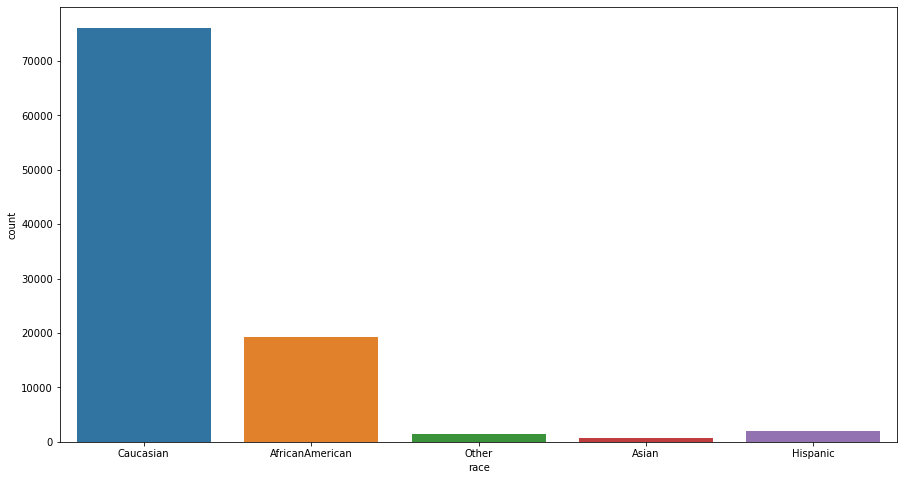

In [11]:
plt.figure(figsize = (15,8))
sns.countplot(df["race"])
plt.show()

In [12]:
df['race'].value_counts()

Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

In [13]:
df["race"].fillna("Other", inplace=True)

In [14]:
df['race'].value_counts()

Caucasian          76099
AfricanAmerican    19210
Other               3779
Hispanic            2037
Asian                641
Name: race, dtype: int64

### Duplicates in patient_nbr

In [15]:
df.drop_duplicates(subset = ["patient_nbr"], keep = "first", inplace=True, ignore_index=True)

In [16]:
len(df)

71518

### Diag_1, Diag_2, Diag_3

In [17]:
df.dropna(subset = ["diag_1", "diag_2", "diag_3"], axis=0, how = "any", inplace=True)

In [18]:
df.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                      67403
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  30327
medical_specialty           34104
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [19]:
len(df)

70233

#### Gender

In [20]:
df["gender"].value_counts()

Female             37383
Male               32847
Unknown/Invalid        3
Name: gender, dtype: int64

In [21]:
#Dropping 3 invalid gender data points

In [22]:
df[df["gender"] == "Unknown/Invalid"]

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
22926,98634858,100695042,Other,Unknown/Invalid,[70-80),NaN,3,1,1,1,NaN,Cardiology,5,5,22,0,0,0,414,411,401,4,None,None,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,Ch,Yes,NO
55129,226864668,60524946,Other,Unknown/Invalid,[60-70),NaN,1,1,7,1,CP,NaN,38,1,6,0,0,0,808,873,E813,5,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
59490,257364294,78119847,Other,Unknown/Invalid,[70-80),NaN,1,22,7,8,CP,NaN,59,2,21,0,0,0,850,805,808,9,None,None,Steady,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,Ch,Yes,NO


In [23]:
df.loc[[22926, 55129, 59490]]

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
22926,98634858,100695042,Other,Unknown/Invalid,[70-80),NaN,3,1,1,1,NaN,Cardiology,5,5,22,0,0,0,414,411,401,4,None,None,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,Ch,Yes,NO
55129,226864668,60524946,Other,Unknown/Invalid,[60-70),NaN,1,1,7,1,CP,NaN,38,1,6,0,0,0,808,873,E813,5,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
59490,257364294,78119847,Other,Unknown/Invalid,[70-80),NaN,1,22,7,8,CP,NaN,59,2,21,0,0,0,850,805,808,9,None,None,Steady,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,Ch,Yes,NO


In [24]:
df.drop(index = [22926, 55129, 59490], inplace=True)

In [25]:
df["gender"].value_counts()

Female    37383
Male      32847
Name: gender, dtype: int64

### Weight

In [26]:
df.drop("weight", axis=1, inplace=True)

In [27]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,NaN,NaN,31,6,16,0,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30


### Payer_code

In [28]:
df.drop("payer_code", axis=1, inplace=True )

In [29]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,NaN,31,6,16,0,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30


### Medical_specialty

In [30]:
df.drop("medical_specialty", axis=1, inplace=True)

In [31]:
(df.isnull().sum()/len(df))*100

encounter_id                0.0
patient_nbr                 0.0
race                        0.0
gender                      0.0
age                         0.0
admission_type_id           0.0
discharge_disposition_id    0.0
admission_source_id         0.0
time_in_hospital            0.0
num_lab_procedures          0.0
num_procedures              0.0
num_medications             0.0
number_outpatient           0.0
number_emergency            0.0
number_inpatient            0.0
diag_1                      0.0
diag_2                      0.0
diag_3                      0.0
number_diagnoses            0.0
max_glu_serum               0.0
A1Cresult                   0.0
metformin                   0.0
repaglinide                 0.0
nateglinide                 0.0
chlorpropamide              0.0
glimepiride                 0.0
acetohexamide               0.0
glipizide                   0.0
glyburide                   0.0
tolbutamide                 0.0
pioglitazone                0.0
rosiglit

In [32]:
#We have completed the missing value treatment and the final shape of the dataset is:

In [33]:
df.shape

(70230, 47)

In [34]:
####Adjusting age column properly and will replace age bucket with an integer i.e. mid value of the age group later

In [35]:
df['age'].value_counts()

[70-80)     18068
[60-70)     15797
[50-60)     12280
[80-90)     11507
[40-50)      6685
[30-40)      2570
[90-100)     1895
[20-30)      1021
[10-20)       343
[0-10)         64
Name: age, dtype: int64

In [36]:
df['age'] = df['age'].map({'[0-10)': 5,
           '[10-20)': 15,
           '[20-30)': 25,
           '[30-40)': 35,
           '[40-50)': 45,
           '[50-60)': 55,
           '[60-70)': 65,
           '[70-80)': 75,
           '[80-90)': 85,
           '[90-100)': 95
          })

In [37]:
#### From ICD-9-CM codes, we can replace the numbers in columns diag_1, diag_2, diag_3 with their respective diagnosis name

In [38]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,15,1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,25,1,1,7,2,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,35,1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,45,1,1,7,1,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,55,2,1,2,3,31,6,16,0,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30


### Feature Engineering

In [39]:
#### Modifying the readmitted column to class 0 or 1 based on the readmission

In [40]:
df['readmitted'].replace('NO', "No", inplace = True)

df['readmitted'].replace(['>30','<30'], "Yes", inplace = True)

In [41]:
df['readmitted'].value_counts()

No     42041
Yes    28189
Name: readmitted, dtype: int64

In [42]:
df['insulin'].value_counts()

No        34410
Steady    21636
Down       7355
Up         6829
Name: insulin, dtype: int64

In [43]:
df.loc[(df['insulin'] == 'Steady') | (df['insulin'] == 'Down') | (df['insulin'] == 'Up'), 'insulin'] = 'Yes'

In [44]:
df['insulin'].value_counts()

Yes    35820
No     34410
Name: insulin, dtype: int64

In [45]:
df['diabetesMed'].value_counts()

Yes    53305
No     16925
Name: diabetesMed, dtype: int64

### Diag_1, Diag_2, Diag_3

#### We have taken into consideration the code range for various diagnosis from icd9cm codes

In [46]:
def cat_ICD9(x):
    if 'V' in str(x):
        return 'Supplementary Classification of External Causes of Injury and Poisoning'
    elif "E" in str(x):
        return 'Supplementary Classification of Factors influencing Health Status and Contact with Health Services'
    elif float(x) >= 0 and float(x) <= 139:
        return "Infectious and Parasitic Diseases"
    elif float(x) >=140 and float(x)<= 239:
        return 'Neoplasms'
    elif (float(x) >= 240 and float(x)< 250) or (float(x) >= 251 and float(x)<= 279) :
        return 'Endocrine, Nutritional and Metabolic Diseases, and Immunity Disorders'
    elif float(x) >=250 and float(x) < 251:
        return 'Diabetes Mellitus'
    elif float(x) >=280 and float(x)<=289:
        return 'Diseases of the Blood and Blood-forming Organs'
    elif float(x) >=290 and float(x)<=319:
        return 'Mental Disorders'
    elif float(x) >=320 and float(x)<=389:
        return 'Diseases of the Nervous System and Sense Organs'
    elif (float(x) >= 390 and float(x)<= 459) or (float(x) == 785):
        return 'Diseases of the Circulatory System'
    elif (float(x) >=460 and float(x)<= 519)  or (float(x) == 786):
        return 'Diseases of the Respiratory System'
    elif (float(x) >= 520 and float(x)<= 579) or (float(x) == 787):
        return 'Diseases of the Digestive System'
    elif (float(x) >=580 and float(x)<= 629) or (float(x) == 788):
        return 'Diseases of the Genitourinary System'
    elif float(x) >= 630 and float(x)<= 679:
        return 'Complications of Pregnancy, Childbirth, and the Puerperium'
    elif (float(x) >= 680 and float(x)<= 709) or (float(x) == 782):
        return 'Diseases of the Skin and Subcutaneous Tissue'
    elif float(x)>=710 and float(x)<= 739:
        return 'Diseases of the Musculoskeletal System and Connective Tissue'
    elif float(x) >=740 and float(x)<=759:
        return 'Congenital Anomalies'
    elif float(x) >=760 and float(x)<=779:
        return 'Certain Conditions originating in the Perinatal Period'
    elif (float(x) >=790 and float(x)<= 799) or (float(x) == 780) or (float(x) == 781) or (float(x) == 784):
        return 'Symptoms, Signs and Ill-defined Conditions'
    elif float(x)>=800 and float(x)<= 999:
        return 'Injury and Poisoning'
    else:
        return 'Others'

In [47]:
#Applying the categories to diag_1, 2, 3

In [48]:
diag_1_list = list(df['diag_1'])
diag_2_list = list(df['diag_2'])
diag_3_list = list(df['diag_3'])

In [49]:
df['diag_1'] = df['diag_1'].apply(cat_ICD9, diag_1_list)

In [50]:
df['diag_2'] = df['diag_2'].apply(cat_ICD9, diag_1_list)

In [51]:
df['diag_3'] = df['diag_3'].apply(cat_ICD9, diag_1_list)

In [52]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,15,1,1,7,3,59,0,18,0,0,0,"Endocrine, Nutritional and Metabolic Diseases,...",Diabetes Mellitus,"Endocrine, Nutritional and Metabolic Diseases,...",9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,Ch,Yes,Yes
2,64410,86047875,AfricanAmerican,Female,25,1,1,7,2,11,5,13,2,0,1,"Complications of Pregnancy, Childbirth, and th...",Diabetes Mellitus,Supplementary Classification of External Cause...,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No
3,500364,82442376,Caucasian,Male,35,1,1,7,2,44,1,16,0,0,0,Infectious and Parasitic Diseases,Diabetes Mellitus,Diseases of the Circulatory System,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,Ch,Yes,No
4,16680,42519267,Caucasian,Male,45,1,1,7,1,51,0,8,0,0,0,Neoplasms,Neoplasms,Diabetes Mellitus,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,Ch,Yes,No
5,35754,82637451,Caucasian,Male,55,2,1,2,3,31,6,16,0,0,0,Diseases of the Circulatory System,Diseases of the Circulatory System,Diabetes Mellitus,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,Yes,Yes


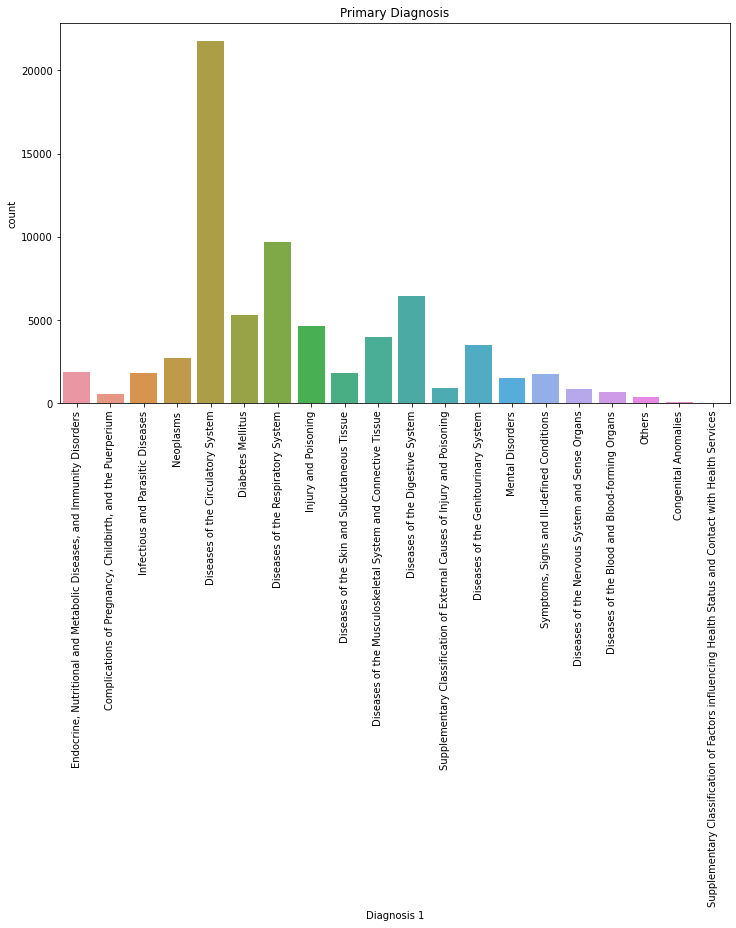

In [53]:
fig, ax = plt.subplots(figsize = (12,7))
sns.countplot(df['diag_1'])
plt.xticks(rotation = 90)
#plt.legend(title = 'Diagnosis', loc = 'upper right', labels = ['A','B'])
plt.xlabel('Diagnosis 1')
plt.title("Primary Diagnosis")
plt.show()

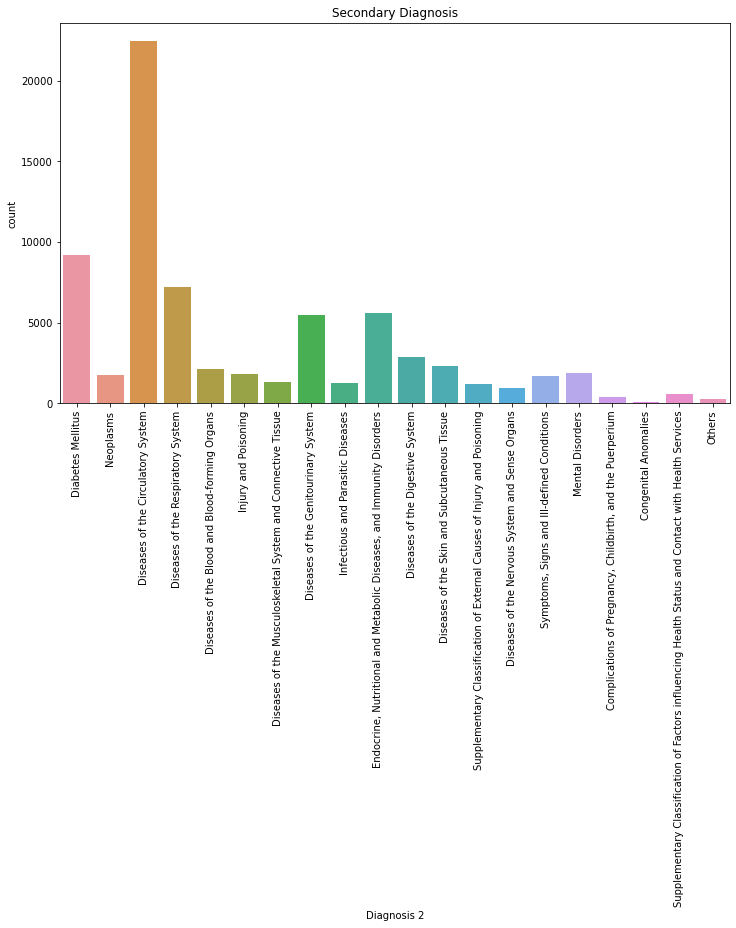

In [54]:
fig, ax = plt.subplots(figsize = (12,7))
sns.countplot(df['diag_2'])
plt.xticks(rotation = 90)
#plt.legend(title = 'Diagnosis', loc = 'upper right', labels = ['A','B'])
plt.xlabel('Diagnosis 2')
plt.title("Secondary Diagnosis")
plt.show()

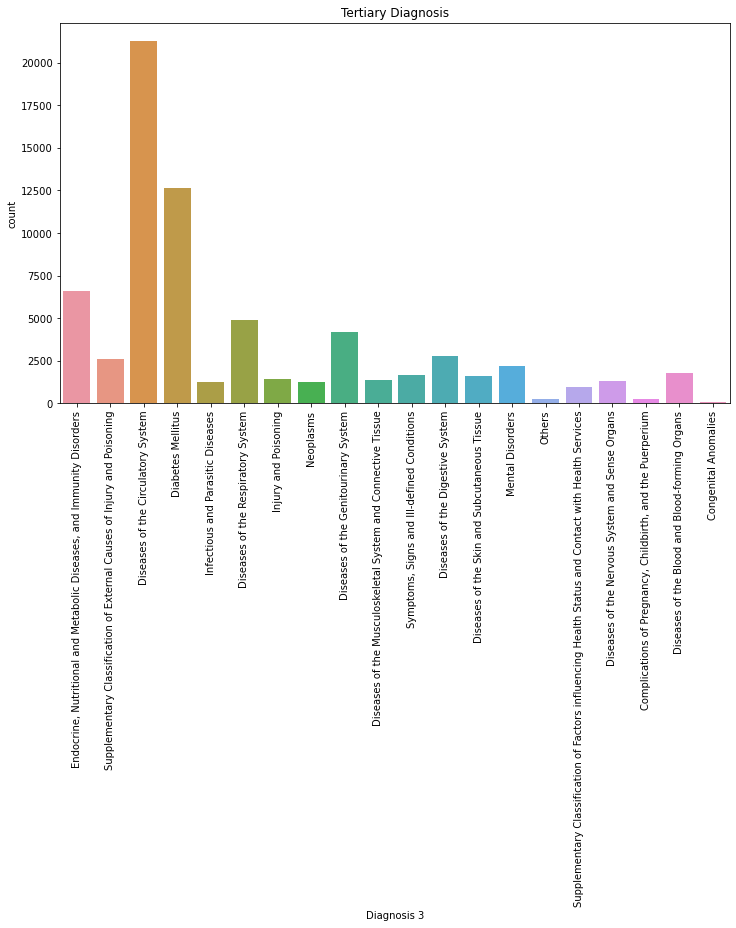

In [55]:
fig, ax = plt.subplots(figsize = (12,7))
sns.countplot(df['diag_3'])
plt.xticks(rotation = 90)
#plt.legend(title = 'Diagnosis', loc = 'upper right', labels = ['A','B'])
plt.xlabel('Diagnosis 3')
plt.title("Tertiary Diagnosis")
plt.show()

In [56]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

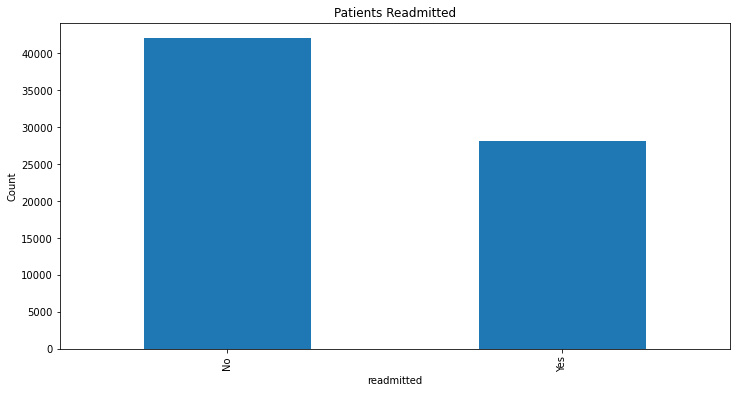

In [57]:
plt.figure(figsize = (12,6))
df.groupby('readmitted').size().plot(kind='bar')
plt.ylabel('Count')
plt.title('Patients Readmitted')
plt.show()

In [58]:
df['age'].value_counts()

75    18068
65    15797
55    12280
85    11507
45     6685
35     2570
95     1895
25     1021
15      343
5        64
Name: age, dtype: int64

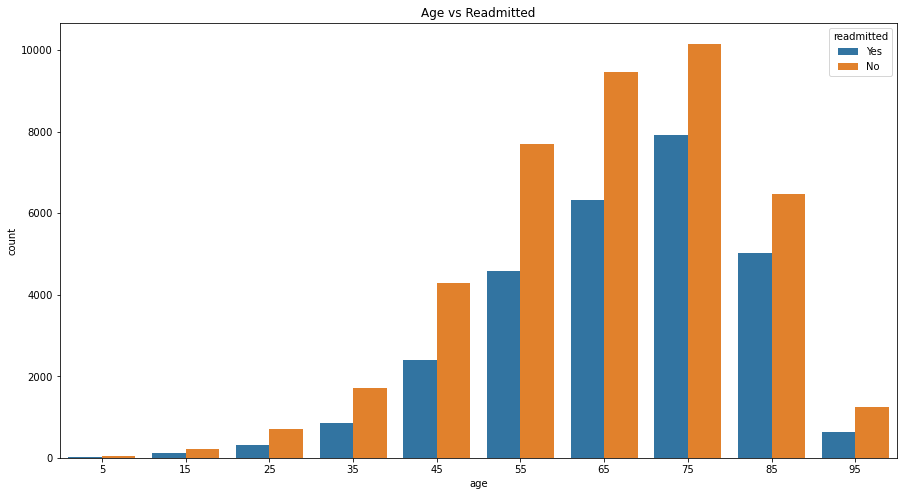

In [59]:
fig = plt.figure(figsize=(15,8))
sns.countplot(x= df['age'], hue = df['readmitted'])
plt.title("Age vs Readmitted")
plt.show()

### admission_type_id

In [60]:
df['admission_type_id'].value_counts()

1    35864
3    13651
2    12787
6     4499
5     3113
8      286
7       21
4        9
Name: admission_type_id, dtype: int64

In [61]:
#df['admission_type_id'] = df['admission_type_id'].map({1: 'Emergency',
#                                                      2: 'Urgent',
#                                                      3: 'Elective',
#                                                      4: 'Newborn',
#                                                      5: 'Not Available',
 #                                                     6: 'NULL',
  #                                                    7: 'Trauma Center',
   #                                                   8: 'Not Mapped'
    #                                                  })

In [62]:
#df['admission_type_id'].value_counts()

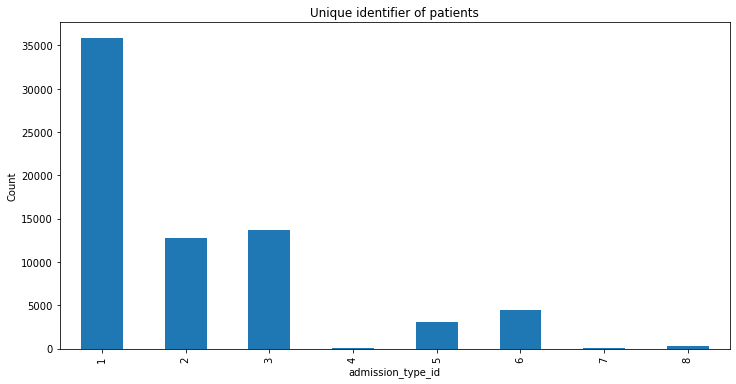

In [63]:
plt.figure(figsize = (12,6))
df.groupby('admission_type_id').size().plot(kind='bar')
plt.ylabel('Count')
plt.title("Unique identifier of patients")
plt.show()

### admission_source_id

In [64]:
df['admission_source_id'].value_counts()

7     37719
1     21556
17     4861
4      2545
6      1690
2       918
5       542
20      155
3       131
9        85
8        11
10        7
22        4
14        2
25        2
11        1
13        1
Name: admission_source_id, dtype: int64

admission_source = {1:"Physician Referral",
                   2:"Clinic Referral",
                    3:"HMO Referral",
                   5:"Transfer from a Skilled Nursing Facility (SNF)",
                    6:"Transfer from another health care facility",
                    7:"Emergency Room",
                    8:"Court/Law Enforcement",
                    9:"Not Available",
                    10:"Transfer from critial access hospital",
                    11:"Normal Delivery",
                    12:"Premature Delivery",
                    13:"Sick Baby",
                    14:"Extramural Birth",
                    15:"Not Available",
                    17:"NULL",
                    18:"Transfer From Another Home Health Agency",
                    19:"Readmission to Same Home Health Agency",
                    20:"Not Mapped",
                    21:"Unknown/Invalid",
                    22:"Transfer from hospital inpt/same fac reslt in a sep claim",
                    23:"Born inside this hospital",
                    24:"Born outside this hospital",
                    25:"Transfer from Ambulatory Surgery Center",
                    26:"Transfer from Hospice"
                    }

In [65]:
#df = df.replace({"admission_source_id":admission_source})

In [66]:
#df['admission_source_id'].value_counts()

In [67]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,15,1,1,7,3,59,0,18,0,0,0,"Endocrine, Nutritional and Metabolic Diseases,...",Diabetes Mellitus,"Endocrine, Nutritional and Metabolic Diseases,...",9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,Ch,Yes,Yes
2,64410,86047875,AfricanAmerican,Female,25,1,1,7,2,11,5,13,2,0,1,"Complications of Pregnancy, Childbirth, and th...",Diabetes Mellitus,Supplementary Classification of External Cause...,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No
3,500364,82442376,Caucasian,Male,35,1,1,7,2,44,1,16,0,0,0,Infectious and Parasitic Diseases,Diabetes Mellitus,Diseases of the Circulatory System,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,Ch,Yes,No
4,16680,42519267,Caucasian,Male,45,1,1,7,1,51,0,8,0,0,0,Neoplasms,Neoplasms,Diabetes Mellitus,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,Ch,Yes,No
5,35754,82637451,Caucasian,Male,55,2,1,2,3,31,6,16,0,0,0,Diseases of the Circulatory System,Diseases of the Circulatory System,Diabetes Mellitus,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,Yes,Yes


In [68]:
df["diabetesMed"].value_counts()

Yes    53305
No     16925
Name: diabetesMed, dtype: int64

In [69]:
df["insulin"].value_counts()

Yes    35820
No     34410
Name: insulin, dtype: int64

In [70]:
df_meds = df[['metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']]
df_meds.head()

,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone
1,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
2,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
3,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
4,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
5,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No


In [71]:
cols = df_meds.columns
for col in cols:
    print(df[col].value_counts())

No        55492
Steady    13495
Up          818
Down        425
Name: metformin, dtype: int64
No        69310
Steady      820
Up           71
Down         29
Name: repaglinide, dtype: int64
No        69736
Steady      470
Up           16
Down          8
Name: nateglinide, dtype: int64
No        70160
Steady       65
Up            4
Down          1
Name: chlorpropamide, dtype: int64
No        66526
Steady     3336
Up          231
Down        137
Name: glimepiride, dtype: int64
No        70229
Steady        1
Name: acetohexamide, dtype: int64
No        61227
Steady     8051
Up          576
Down        376
Name: glipizide, dtype: int64
No        62490
Steady     6709
Up          618
Down        413
Name: glyburide, dtype: int64
No        70211
Steady       19
Name: tolbutamide, dtype: int64
No        64990
Steady     4983
Up          177
Down         80
Name: pioglitazone, dtype: int64
No        65584
Steady     4436
Up          135
Down         75
Name: rosiglitazone, dtype: int64
No    

In [72]:
#examide and citoglipton columns are all no, hence we can drop them as they will not help in further analysis

In [73]:
df.drop(["examide", "citoglipton"], axis=1, inplace=True)

In [74]:
#Updating the columns with medical prescription to yes and no classes, for easier understanding

In [75]:
df["metformin"].replace(['Steady','Up', "Down"], "Yes", inplace = True)

In [76]:
df["repaglinide"].replace(['Steady','Up', "Down"], "Yes", inplace = True)

In [77]:
df["nateglinide"].replace(['Steady','Up', "Down"], "Yes", inplace = True)

In [78]:
df["chlorpropamide"].replace(['Steady','Up', "Down"], "Yes", inplace = True)

In [79]:
df["glimepiride"].replace(['Steady','Up', "Down"], "Yes", inplace = True)

In [80]:
df["acetohexamide"].replace('Steady', "Yes", inplace = True)

In [81]:
df["glipizide"].replace(['Steady','Up', "Down"], "Yes", inplace = True)

In [82]:
df["glyburide"].replace(['Steady','Up', "Down"], "Yes", inplace = True)

In [83]:
df["tolbutamide"].replace(['Steady'], "Yes", inplace = True)

In [84]:
df["pioglitazone"].replace(['Steady','Up', "Down"], "Yes", inplace = True)

In [85]:
df["rosiglitazone"].replace(['Steady','Up', "Down"], "Yes", inplace = True)

In [86]:
df["acarbose"].replace(['Steady','Up'], "Yes", inplace = True)

In [87]:
df["miglitol"].replace(['Steady','Up', "Down"], "Yes", inplace = True)

In [88]:
df["troglitazone"].replace(['Steady'], "Yes", inplace = True)

In [89]:
df["tolazamide"].replace(['Steady'], "Yes", inplace = True)

In [90]:
df["glyburide-metformin"].replace(['Steady','Up', "Down"], "Yes", inplace = True)

In [91]:
df["glipizide-metformin"].replace(['Steady'], "Yes", inplace = True)

In [92]:
df["glimepiride-pioglitazone"].replace(['Steady','Up', "Down"], "Yes", inplace = True)

In [93]:
df["metformin-rosiglitazone"].replace(['Steady'], "Yes", inplace = True)

In [94]:
df["metformin-pioglitazone"].replace(['Steady'], "Yes", inplace = True)

In [95]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,15,1,1,7,3,59,0,18,0,0,0,"Endocrine, Nutritional and Metabolic Diseases,...",Diabetes Mellitus,"Endocrine, Nutritional and Metabolic Diseases,...",9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,Ch,Yes,Yes
2,64410,86047875,AfricanAmerican,Female,25,1,1,7,2,11,5,13,2,0,1,"Complications of Pregnancy, Childbirth, and th...",Diabetes Mellitus,Supplementary Classification of External Cause...,6,None,None,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No
3,500364,82442376,Caucasian,Male,35,1,1,7,2,44,1,16,0,0,0,Infectious and Parasitic Diseases,Diabetes Mellitus,Diseases of the Circulatory System,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,Ch,Yes,No
4,16680,42519267,Caucasian,Male,45,1,1,7,1,51,0,8,0,0,0,Neoplasms,Neoplasms,Diabetes Mellitus,5,None,None,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,Ch,Yes,No
5,35754,82637451,Caucasian,Male,55,2,1,2,3,31,6,16,0,0,0,Diseases of the Circulatory System,Diseases of the Circulatory System,Diabetes Mellitus,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,Yes,Yes


In [96]:
df_meds = df[['metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']]
df_meds.head()

,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone
1,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
2,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No
3,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
4,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No
5,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No


In [97]:
df_meds.shape

(70230, 20)

In [98]:
cols = df_meds.columns
for col in cols:
    df_meds[col].replace(["No", "Yes"], [0,1], inplace=True)

In [99]:
df_meds.head()

,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [100]:
#Checking if atleast one medicine is prescribed, sum>0 implies one or combination of medicines were prescribed

In [101]:
med_yes_no = df_meds.sum(axis = 1, skipna = True)
med_yes_no.value_counts()

0    36412
1    22323
2     9566
3     1849
4       75
5        4
6        1
dtype: int64

In [102]:
len(med_yes_no)

70230

In [103]:
df.shape

(70230, 45)

In [104]:
med_given=[]

for i in med_yes_no:
    if i > 0:
        med_given.append(1)
    else:
        med_given.append(0)

#### Creating a new columns other_drugs and appending it to the dataframe, which tells if atleast one of the 20 (2 drugs were already dropped) drugs were prescribed or not

In [105]:
df["other_drugs"] = med_given

In [106]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,other_drugs
1,149190,55629189,Caucasian,Female,15,1,1,7,3,59,0,18,0,0,0,"Endocrine, Nutritional and Metabolic Diseases,...",Diabetes Mellitus,"Endocrine, Nutritional and Metabolic Diseases,...",9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,Ch,Yes,Yes,0
2,64410,86047875,AfricanAmerican,Female,25,1,1,7,2,11,5,13,2,0,1,"Complications of Pregnancy, Childbirth, and th...",Diabetes Mellitus,Supplementary Classification of External Cause...,6,None,None,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,1
3,500364,82442376,Caucasian,Male,35,1,1,7,2,44,1,16,0,0,0,Infectious and Parasitic Diseases,Diabetes Mellitus,Diseases of the Circulatory System,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,Ch,Yes,No,0
4,16680,42519267,Caucasian,Male,45,1,1,7,1,51,0,8,0,0,0,Neoplasms,Neoplasms,Diabetes Mellitus,5,None,None,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,Ch,Yes,No,1
5,35754,82637451,Caucasian,Male,55,2,1,2,3,31,6,16,0,0,0,Diseases of the Circulatory System,Diseases of the Circulatory System,Diabetes Mellitus,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,Yes,Yes,0


In [107]:
df["insulin"].replace(["No", "Yes"], [0,1], inplace=True )

In [108]:
df[["insulin", "other_drugs"]]

,insulin,other_drugs
1,1,0
2,0,1
3,1,0
4,1,1
5,1,0
...,...,...
71513,1,1
71514,1,1
71515,1,0
71516,1,0


In [109]:
df["other_drugs"].value_counts()

0    36412
1    33818
Name: other_drugs, dtype: int64

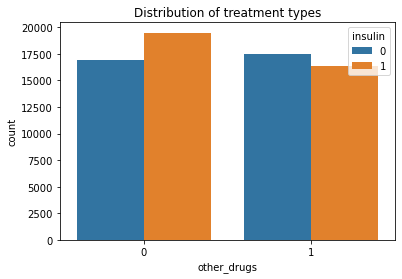

In [110]:
sns.countplot(df["other_drugs"], hue =df["insulin"])
plt.title("Distribution of treatment types")
plt.show()

**Interpretation:**  From above plot we can infer how the medications were prescribed, whether one or combination of drugs and insulin were given together, or were they given separately, or no medication was given

Apprx. 17000 patients were not given any medication (0 for drug_prescribed, 0 for insulin)

We can drop the 20 drug columns as we have simplified them with one column

In [111]:
df.drop(['metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone'], axis=1, inplace=True)

In [112]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,insulin,change,diabetesMed,readmitted,other_drugs
1,149190,55629189,Caucasian,Female,15,1,1,7,3,59,0,18,0,0,0,"Endocrine, Nutritional and Metabolic Diseases,...",Diabetes Mellitus,"Endocrine, Nutritional and Metabolic Diseases,...",9,None,None,1,Ch,Yes,Yes,0
2,64410,86047875,AfricanAmerican,Female,25,1,1,7,2,11,5,13,2,0,1,"Complications of Pregnancy, Childbirth, and th...",Diabetes Mellitus,Supplementary Classification of External Cause...,6,None,None,0,No,Yes,No,1
3,500364,82442376,Caucasian,Male,35,1,1,7,2,44,1,16,0,0,0,Infectious and Parasitic Diseases,Diabetes Mellitus,Diseases of the Circulatory System,7,None,None,1,Ch,Yes,No,0
4,16680,42519267,Caucasian,Male,45,1,1,7,1,51,0,8,0,0,0,Neoplasms,Neoplasms,Diabetes Mellitus,5,None,None,1,Ch,Yes,No,1
5,35754,82637451,Caucasian,Male,55,2,1,2,3,31,6,16,0,0,0,Diseases of the Circulatory System,Diseases of the Circulatory System,Diabetes Mellitus,9,None,None,1,No,Yes,Yes,0


In [113]:
df.shape

(70230, 26)

In [114]:
#df["insulin"] = df["insulin"].astype("object")

In [115]:
#df["other_drugs"] = df["other_drugs"].astype("object")
df.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                          int64
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
insulin                      int64
change                      object
diabetesMed                 object
readmitted                  object
other_drugs                  int64
dtype: object

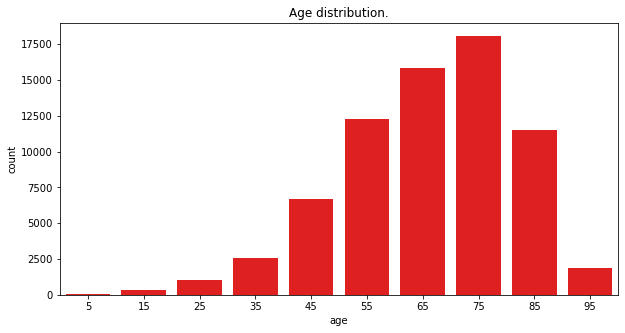

In [116]:

fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(df['age'], color = 'RED', ax=ax)
plt.title('Age distribution.')
plt.show()

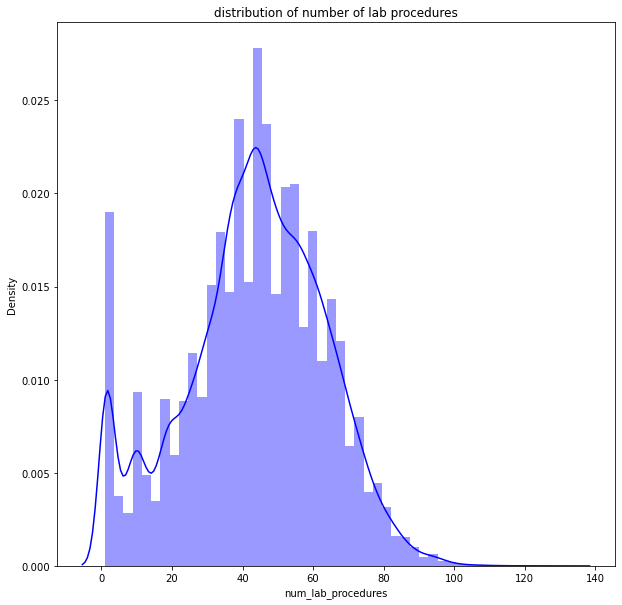

In [117]:
fig, ax = plt.subplots(figsize=(10,10))
sns.distplot(df['num_lab_procedures'], color = 'Blue', ax=ax)
plt.title('distribution of number of lab procedures')
plt.show()

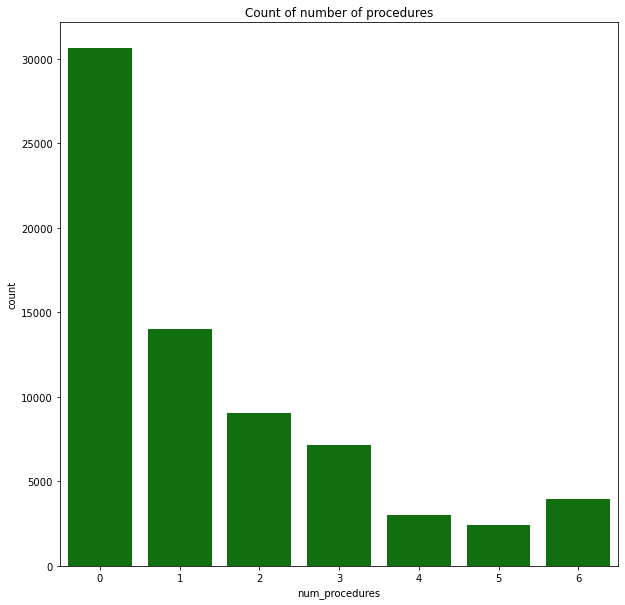

In [118]:
fig, ax = plt.subplots(figsize=(10,10))
sns.countplot(df['num_procedures'], color = 'Green', ax=ax)
plt.title('Count of number of procedures')
plt.show()

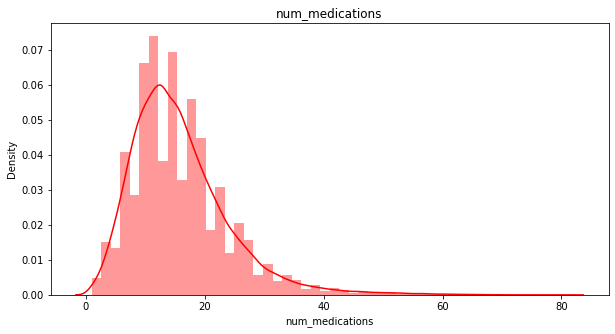

In [119]:
fig, ax = plt.subplots(figsize=(10,5))
sns.distplot(df['num_medications'], color = 'RED', ax=ax)
plt.title('num_medications')
plt.show()

In [120]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,insulin,change,diabetesMed,readmitted,other_drugs
1,149190,55629189,Caucasian,Female,15,1,1,7,3,59,0,18,0,0,0,"Endocrine, Nutritional and Metabolic Diseases,...",Diabetes Mellitus,"Endocrine, Nutritional and Metabolic Diseases,...",9,None,None,1,Ch,Yes,Yes,0
2,64410,86047875,AfricanAmerican,Female,25,1,1,7,2,11,5,13,2,0,1,"Complications of Pregnancy, Childbirth, and th...",Diabetes Mellitus,Supplementary Classification of External Cause...,6,None,None,0,No,Yes,No,1
3,500364,82442376,Caucasian,Male,35,1,1,7,2,44,1,16,0,0,0,Infectious and Parasitic Diseases,Diabetes Mellitus,Diseases of the Circulatory System,7,None,None,1,Ch,Yes,No,0
4,16680,42519267,Caucasian,Male,45,1,1,7,1,51,0,8,0,0,0,Neoplasms,Neoplasms,Diabetes Mellitus,5,None,None,1,Ch,Yes,No,1
5,35754,82637451,Caucasian,Male,55,2,1,2,3,31,6,16,0,0,0,Diseases of the Circulatory System,Diseases of the Circulatory System,Diabetes Mellitus,9,None,None,1,No,Yes,Yes,0


In [121]:
#Excluding data where no medication is given i.e no insulin and no other drugs

In [122]:
df_meds_yes = df[df["diabetesMed"] != "No"]
df_meds_yes.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,insulin,change,diabetesMed,readmitted,other_drugs
1,149190,55629189,Caucasian,Female,15,1,1,7,3,59,0,18,0,0,0,"Endocrine, Nutritional and Metabolic Diseases,...",Diabetes Mellitus,"Endocrine, Nutritional and Metabolic Diseases,...",9,None,None,1,Ch,Yes,Yes,0
2,64410,86047875,AfricanAmerican,Female,25,1,1,7,2,11,5,13,2,0,1,"Complications of Pregnancy, Childbirth, and th...",Diabetes Mellitus,Supplementary Classification of External Cause...,6,None,None,0,No,Yes,No,1
3,500364,82442376,Caucasian,Male,35,1,1,7,2,44,1,16,0,0,0,Infectious and Parasitic Diseases,Diabetes Mellitus,Diseases of the Circulatory System,7,None,None,1,Ch,Yes,No,0
4,16680,42519267,Caucasian,Male,45,1,1,7,1,51,0,8,0,0,0,Neoplasms,Neoplasms,Diabetes Mellitus,5,None,None,1,Ch,Yes,No,1
5,35754,82637451,Caucasian,Male,55,2,1,2,3,31,6,16,0,0,0,Diseases of the Circulatory System,Diseases of the Circulatory System,Diabetes Mellitus,9,None,None,1,No,Yes,Yes,0


In [123]:
df_meds_yes.shape

(53305, 26)

**Interpretation:** Using the treatment columns i.e insulin and other drugs and preparing a target column which comprises of 2 classes as per problem statement
1. solo insulin
2. combination of insulin and other drugs

In [124]:
df_only_meds = df_meds_yes[["insulin", "other_drugs"]]
df_only_meds.head()

,insulin,other_drugs
1,1,0
2,0,1
3,1,0
4,1,1
5,1,0


**Interpretation:**
To seggregate the classes, using sum method along axis 1. Hence replacing 0,1 with different integers
For insulin 0,1 is replaced with 2,3 
Now if the sum is 5, it means only insulin
Otherwise if the sum is 3 or 6, it means both insulin and other drugs

In [125]:
df_only_meds["insulin"].replace([0,1], [2,5], inplace=True)

df_only_meds.head()

,insulin,other_drugs
1,5,0
2,2,1
3,5,0
4,5,1
5,5,0


In [126]:
med_sum = df_only_meds.sum(axis = 1)
med_sum.value_counts()

5    19487
3    17485
6    16333
dtype: int64

In [127]:
#Appending other drugs, insulin, combination in list to add to the dataframe
treatment=[]

for i in med_sum:
    if i == 5:
        treatment.append("solo_insulin")
    else:
        treatment.append("combination")

In [128]:
df_meds_yes.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,insulin,change,diabetesMed,readmitted,other_drugs
1,149190,55629189,Caucasian,Female,15,1,1,7,3,59,0,18,0,0,0,"Endocrine, Nutritional and Metabolic Diseases,...",Diabetes Mellitus,"Endocrine, Nutritional and Metabolic Diseases,...",9,None,None,1,Ch,Yes,Yes,0
2,64410,86047875,AfricanAmerican,Female,25,1,1,7,2,11,5,13,2,0,1,"Complications of Pregnancy, Childbirth, and th...",Diabetes Mellitus,Supplementary Classification of External Cause...,6,None,None,0,No,Yes,No,1
3,500364,82442376,Caucasian,Male,35,1,1,7,2,44,1,16,0,0,0,Infectious and Parasitic Diseases,Diabetes Mellitus,Diseases of the Circulatory System,7,None,None,1,Ch,Yes,No,0
4,16680,42519267,Caucasian,Male,45,1,1,7,1,51,0,8,0,0,0,Neoplasms,Neoplasms,Diabetes Mellitus,5,None,None,1,Ch,Yes,No,1
5,35754,82637451,Caucasian,Male,55,2,1,2,3,31,6,16,0,0,0,Diseases of the Circulatory System,Diseases of the Circulatory System,Diabetes Mellitus,9,None,None,1,No,Yes,Yes,0


In [129]:
df_meds_yes["treatment_type"] = treatment
df_meds_yes.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,insulin,change,diabetesMed,readmitted,other_drugs,treatment_type
1,149190,55629189,Caucasian,Female,15,1,1,7,3,59,0,18,0,0,0,"Endocrine, Nutritional and Metabolic Diseases,...",Diabetes Mellitus,"Endocrine, Nutritional and Metabolic Diseases,...",9,None,None,1,Ch,Yes,Yes,0,solo_insulin
2,64410,86047875,AfricanAmerican,Female,25,1,1,7,2,11,5,13,2,0,1,"Complications of Pregnancy, Childbirth, and th...",Diabetes Mellitus,Supplementary Classification of External Cause...,6,None,None,0,No,Yes,No,1,combination
3,500364,82442376,Caucasian,Male,35,1,1,7,2,44,1,16,0,0,0,Infectious and Parasitic Diseases,Diabetes Mellitus,Diseases of the Circulatory System,7,None,None,1,Ch,Yes,No,0,solo_insulin
4,16680,42519267,Caucasian,Male,45,1,1,7,1,51,0,8,0,0,0,Neoplasms,Neoplasms,Diabetes Mellitus,5,None,None,1,Ch,Yes,No,1,combination
5,35754,82637451,Caucasian,Male,55,2,1,2,3,31,6,16,0,0,0,Diseases of the Circulatory System,Diseases of the Circulatory System,Diabetes Mellitus,9,None,None,1,No,Yes,Yes,0,solo_insulin


In [130]:
#Now that we have the target column by combining insulin and other_drugs columns, we can drop them

In [131]:
df_meds_yes.drop(["insulin", "other_drugs"], axis=1, inplace=True)
df_meds_yes.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,treatment_type
1,149190,55629189,Caucasian,Female,15,1,1,7,3,59,0,18,0,0,0,"Endocrine, Nutritional and Metabolic Diseases,...",Diabetes Mellitus,"Endocrine, Nutritional and Metabolic Diseases,...",9,None,None,Ch,Yes,Yes,solo_insulin
2,64410,86047875,AfricanAmerican,Female,25,1,1,7,2,11,5,13,2,0,1,"Complications of Pregnancy, Childbirth, and th...",Diabetes Mellitus,Supplementary Classification of External Cause...,6,None,None,No,Yes,No,combination
3,500364,82442376,Caucasian,Male,35,1,1,7,2,44,1,16,0,0,0,Infectious and Parasitic Diseases,Diabetes Mellitus,Diseases of the Circulatory System,7,None,None,Ch,Yes,No,solo_insulin
4,16680,42519267,Caucasian,Male,45,1,1,7,1,51,0,8,0,0,0,Neoplasms,Neoplasms,Diabetes Mellitus,5,None,None,Ch,Yes,No,combination
5,35754,82637451,Caucasian,Male,55,2,1,2,3,31,6,16,0,0,0,Diseases of the Circulatory System,Diseases of the Circulatory System,Diabetes Mellitus,9,None,None,No,Yes,Yes,solo_insulin


In [132]:
df_meds_yes.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                          int64
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
change                      object
diabetesMed                 object
readmitted                  object
treatment_type              object
dtype: object

Since we have dropped all the rows with diabetesmeds = No, we can drop the column diabetesMed as it is only yes

In [133]:
df_meds_yes['diabetesMed'].value_counts()

Yes    53305
Name: diabetesMed, dtype: int64

In [134]:

df_meds_yes.drop("diabetesMed", axis=1, inplace=True)

### Label Encoding

In [135]:
df_meds_yes.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,change,readmitted,treatment_type
1,149190,55629189,Caucasian,Female,15,1,1,7,3,59,0,18,0,0,0,"Endocrine, Nutritional and Metabolic Diseases,...",Diabetes Mellitus,"Endocrine, Nutritional and Metabolic Diseases,...",9,None,None,Ch,Yes,solo_insulin
2,64410,86047875,AfricanAmerican,Female,25,1,1,7,2,11,5,13,2,0,1,"Complications of Pregnancy, Childbirth, and th...",Diabetes Mellitus,Supplementary Classification of External Cause...,6,None,None,No,No,combination
3,500364,82442376,Caucasian,Male,35,1,1,7,2,44,1,16,0,0,0,Infectious and Parasitic Diseases,Diabetes Mellitus,Diseases of the Circulatory System,7,None,None,Ch,No,solo_insulin
4,16680,42519267,Caucasian,Male,45,1,1,7,1,51,0,8,0,0,0,Neoplasms,Neoplasms,Diabetes Mellitus,5,None,None,Ch,No,combination
5,35754,82637451,Caucasian,Male,55,2,1,2,3,31,6,16,0,0,0,Diseases of the Circulatory System,Diseases of the Circulatory System,Diabetes Mellitus,9,None,None,No,Yes,solo_insulin


**Interpretation:**
columns - race, gender, max_glu_serum, A1Cresult, change, readmitted and treatment_type can be given labels
Structure for labelling
No --> 0
Yes --> 1
Female --> 0
Male --> 1
Other categories will be labelled in alphabetical order

In [136]:
df_meds_yes["treatment_type"].value_counts()

combination     33818
solo_insulin    19487
Name: treatment_type, dtype: int64

**Plot a countplot to visualize treatment type:**

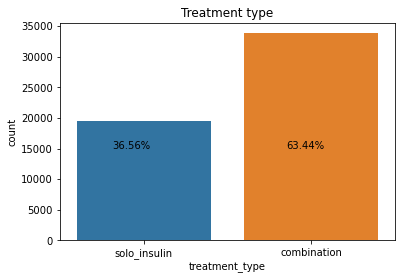

In [137]:
p_of_comb = str(round((df_meds_yes["treatment_type"].value_counts()[0]/len(df_meds_yes))*100,2))+"%"
p_of_insulin = str(round((df_meds_yes["treatment_type"].value_counts()[1]/len(df_meds_yes))*100,2))+"%"


sns.countplot(df_meds_yes["treatment_type"])
plt.text(x=-0.19, y= 15000, s=p_of_insulin)

plt.text(x=0.85, y=15000, s=p_of_comb)
plt.title("Treatment type")
plt.show()

**Interpretation:** Target column is inbalanced, we use resampling techniques(SMOTE) to balance dataset

In [138]:
df_meds_yes.shape

(53305, 24)

In [139]:
df_meds_yes["gender"].replace(["Female", "Male"], [0,1], inplace=True)

In [140]:
df_meds_yes["max_glu_serum"].value_counts()

None    50890
Norm     1049
>200      748
>300      618
Name: max_glu_serum, dtype: int64

In [141]:
#Replacing max_glu_serum with none-0, norm-1, >200-2 & >300-3
df_meds_yes["max_glu_serum"].replace(["None", "Norm", ">200", ">300"], [0,1,2,3], inplace=True)

In [142]:
df_meds_yes["A1Cresult"].value_counts()

None    42896
>8       5403
Norm     2730
>7       2276
Name: A1Cresult, dtype: int64

In [143]:
#Replacing A1Cresult with None= 0, Norm = 1, >7,8 as 2
df_meds_yes["A1Cresult"].replace(["None", "Norm", ">7", ">8"], [0,1,2,2], inplace=True)

In [144]:
df_meds_yes["change"].value_counts()

Ch    31478
No    21827
Name: change, dtype: int64

In [145]:
#Replacing change with No-0, Ch-1
df_meds_yes["change"].replace(["No", "Ch"], [0,1], inplace=True)

In [146]:
df_meds_yes["readmitted"].value_counts()

No     30969
Yes    22336
Name: readmitted, dtype: int64

In [147]:
df_meds_yes["readmitted"].replace(["No", "Yes"], [0,1], inplace=True)

In [148]:
#Converting the target variable treatment_type to only insulin-0, combination-1
df_meds_yes["treatment_type"].replace(["solo_insulin", "combination"], [0,1], inplace=True)

In [149]:
df_meds_yes.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,change,readmitted,treatment_type
1,149190,55629189,Caucasian,0,15,1,1,7,3,59,0,18,0,0,0,"Endocrine, Nutritional and Metabolic Diseases,...",Diabetes Mellitus,"Endocrine, Nutritional and Metabolic Diseases,...",9,0,0,1,1,0
2,64410,86047875,AfricanAmerican,0,25,1,1,7,2,11,5,13,2,0,1,"Complications of Pregnancy, Childbirth, and th...",Diabetes Mellitus,Supplementary Classification of External Cause...,6,0,0,0,0,1
3,500364,82442376,Caucasian,1,35,1,1,7,2,44,1,16,0,0,0,Infectious and Parasitic Diseases,Diabetes Mellitus,Diseases of the Circulatory System,7,0,0,1,0,0
4,16680,42519267,Caucasian,1,45,1,1,7,1,51,0,8,0,0,0,Neoplasms,Neoplasms,Diabetes Mellitus,5,0,0,1,0,1
5,35754,82637451,Caucasian,1,55,2,1,2,3,31,6,16,0,0,0,Diseases of the Circulatory System,Diseases of the Circulatory System,Diabetes Mellitus,9,0,0,0,1,0


#### Label Encoding diag_1,2,3

In [150]:
le = LabelEncoder()
df_meds_yes["diag_1_LE"] = le.fit_transform(df_meds_yes["diag_1"])
df_meds_yes["diag_2_LE"] = le.fit_transform(df_meds_yes["diag_2"])
df_meds_yes["diag_3_LE"] = le.fit_transform(df_meds_yes["diag_3"])

In [151]:
df_race_dummies = pd.get_dummies(df_meds_yes['race'], drop_first = True, prefix = 'race_')

In [152]:
df_final = pd.concat([df_meds_yes, df_race_dummies],axis = 1)
df_final.drop(["race", "diag_1", "diag_2", "diag_3"], axis = 1, inplace = True)
df_final.shape

(53305, 27)

In [153]:
df_final.head()

,encounter_id,patient_nbr,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,change,readmitted,treatment_type,diag_1_LE,diag_2_LE,diag_3_LE,race__Asian,race__Caucasian,race__Hispanic,race__Other
1,149190,55629189,0,15,1,1,7,3,59,0,18,0,0,0,9,0,0,1,1,0,11,2,11,0,1,0,0
2,64410,86047875,0,25,1,1,7,2,11,5,13,2,0,1,6,0,0,0,0,1,0,2,17,0,0,0,0
3,500364,82442376,1,35,1,1,7,2,44,1,16,0,0,0,7,0,0,1,0,0,12,2,4,0,1,0,0
4,16680,42519267,1,45,1,1,7,1,51,0,8,0,0,0,5,0,0,1,0,1,15,15,2,0,1,0,0
5,35754,82637451,1,55,2,1,2,3,31,6,16,0,0,0,9,0,0,0,1,0,4,4,2,0,1,0,0


### Dividing into Independent and Dependent variables


In [229]:
#Dropping encounter_id and patient_nbr from X as they are just ids
X = df_final.drop(['treatment_type','encounter_id','patient_nbr'], axis = 1)
y = df_final['treatment_type']

In [230]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)
print('X_train size: ', X_train.shape)
print('X_test size:  ', X_test.shape)
print('y_train size:  ', y_train.shape)
print('y_test size:   ', y_test.shape)

X_train size:  (37313, 24)
X_test size:   (15992, 24)
y_train size:   (37313,)
y_test size:    (15992,)


# Base Model

## Assumptions test for the classification problem:

#### In the base model we have used Logistic Regression, Decision tree, Random forest, KNN, Naive Bayes algorithms. We will test the assumptions for all the algorithms. 

### Logistic Regression assumption test:

#### Normality of residuals

In [231]:
import scipy.stats as stats

In [232]:
# build the model on train data (X_train and y_train)
# use fit() to fit the logistic regression model
lr=LogisticRegression()
lr_model=lr.fit(X_train, y_train)

y_pred_lr=lr_model.predict(X_test)
residual=y_test-y_pred_lr

#Test of normality:
stats.shapiro(residual)

ShapiroResult(statistic=0.7304098010063171, pvalue=0.0)

In [158]:

#Pval < 0.05
#Ho rejected 
#Residuals are not normally distributed. So the assumptions of Logistic regression satisfied.

#### Test of MultiCollinearity:

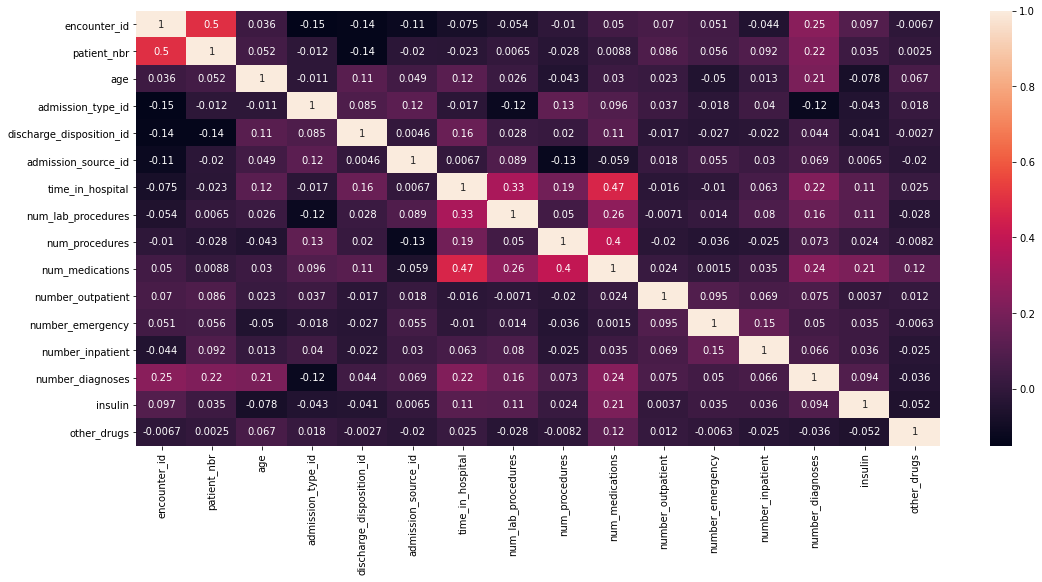

In [159]:
plt.figure(figsize=(18,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

**Interpretation:** From the above plot we can see that none of the feature is included in multicollinearity. So the assumption of multicollinearity is satisfied.

### Logistic Regression Model:

In [235]:
# build the model on train data (X_train and y_train)
# use fit() to fit the logistic regression model
lr=LogisticRegression()
lr_model=lr.fit(X_train, y_train)

y_pred_lr=lr_model.predict(X_test)
y_pred_lr_train = lr_model.predict(X_train)


#Print Classification report:
print(classification_report(y_test,y_pred_lr))



#Print Accuracy Score for Logistic regression model:
accuracy_lr=accuracy_score(y_test,y_pred_lr)*100
print("Accuracy score for the logistic model is:", round(accuracy_lr,2))


#Print F1 score:
f1_score_lr=f1_score(y_test, y_pred_lr, average='weighted')*100
print("F1 score for the model is:", round(f1_score_lr,2))

              precision    recall  f1-score   support

           0       0.58      0.34      0.43      5883
           1       0.69      0.86      0.76     10109

    accuracy                           0.67     15992
   macro avg       0.63      0.60      0.60     15992
weighted avg       0.65      0.67      0.64     15992

Accuracy score for the logistic model is: 66.64
F1 score for the model is: 64.05


In [237]:
accuracy_train  = accuracy_score(y_train,y_pred_lr_train)*100
accuracy_train

67.4858628360089

In [161]:
from matplotlib.colors import ListedColormap

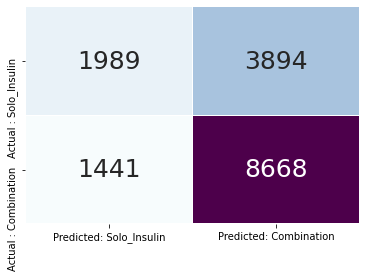

In [162]:
cm = confusion_matrix(y_test, y_pred_lr)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted: Solo_Insulin','Predicted: Combination'], 
                           index = ['Actual : Solo_Insulin', 'Actual : Combination'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap= "BuPu", cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()


In [163]:
y_predprob = lr_model.predict_proba(X_test)
y_predprob = lr_model.predict_proba(X_test)
y_predprob

array([[0.34168996, 0.65831004],
       [0.36917606, 0.63082394],
       [0.25945904, 0.74054096],
       ...,
       [0.31324324, 0.68675676],
       [0.35353703, 0.64646297],
       [0.52899529, 0.47100471]])

In [164]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

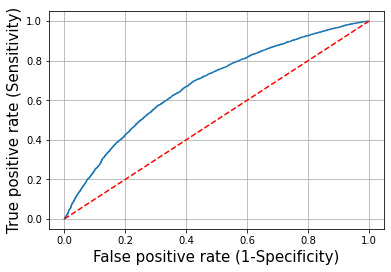

In [165]:
fpr, tpr, thresholds = roc_curve(y_test, y_predprob[:,1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

                               
# plot the grid
plt.grid(True)
plt.show()

### Decision Tree model:

In [239]:
# build the model on train data (X_train and y_train)
# use fit() to fit the Decision Tree model
dt = DecisionTreeClassifier(max_depth=3)
dt_model=dt.fit(X_train,y_train)

y_pred_dt = dt_model.predict(X_test)



#Print Classification report:
print(classification_report(y_test,y_pred_lr))


#Print accuracy score for Decision Tree model:
accuracy_dt=accuracy_score(y_test, y_pred_dt)*100
print("Accuracy score for the Decision Tree model is:",round(accuracy_dt,2))

#Print F1 score:
f1_score_dt=f1_score(y_test, y_pred_dt, average='weighted')*100
print("F1 score for the model is:", round(f1_score_dt,2))


              precision    recall  f1-score   support

           0       0.58      0.34      0.43      5883
           1       0.69      0.86      0.76     10109

    accuracy                           0.67     15992
   macro avg       0.63      0.60      0.60     15992
weighted avg       0.65      0.67      0.64     15992

Accuracy score for the Decision Tree model is: 66.71
F1 score for the model is: 64.1


In [241]:
y_pred_dt_train = dt_model.predict(X_train)
accuracy_train_dt = accuracy_score(y_train, y_pred_dt_train)*100
accuracy_train_dt

67.52338327124595

**Plot Decision Tree:**

In [167]:
import pydotplus
from IPython.display import Image

In [168]:
from sklearn.tree import plot_tree

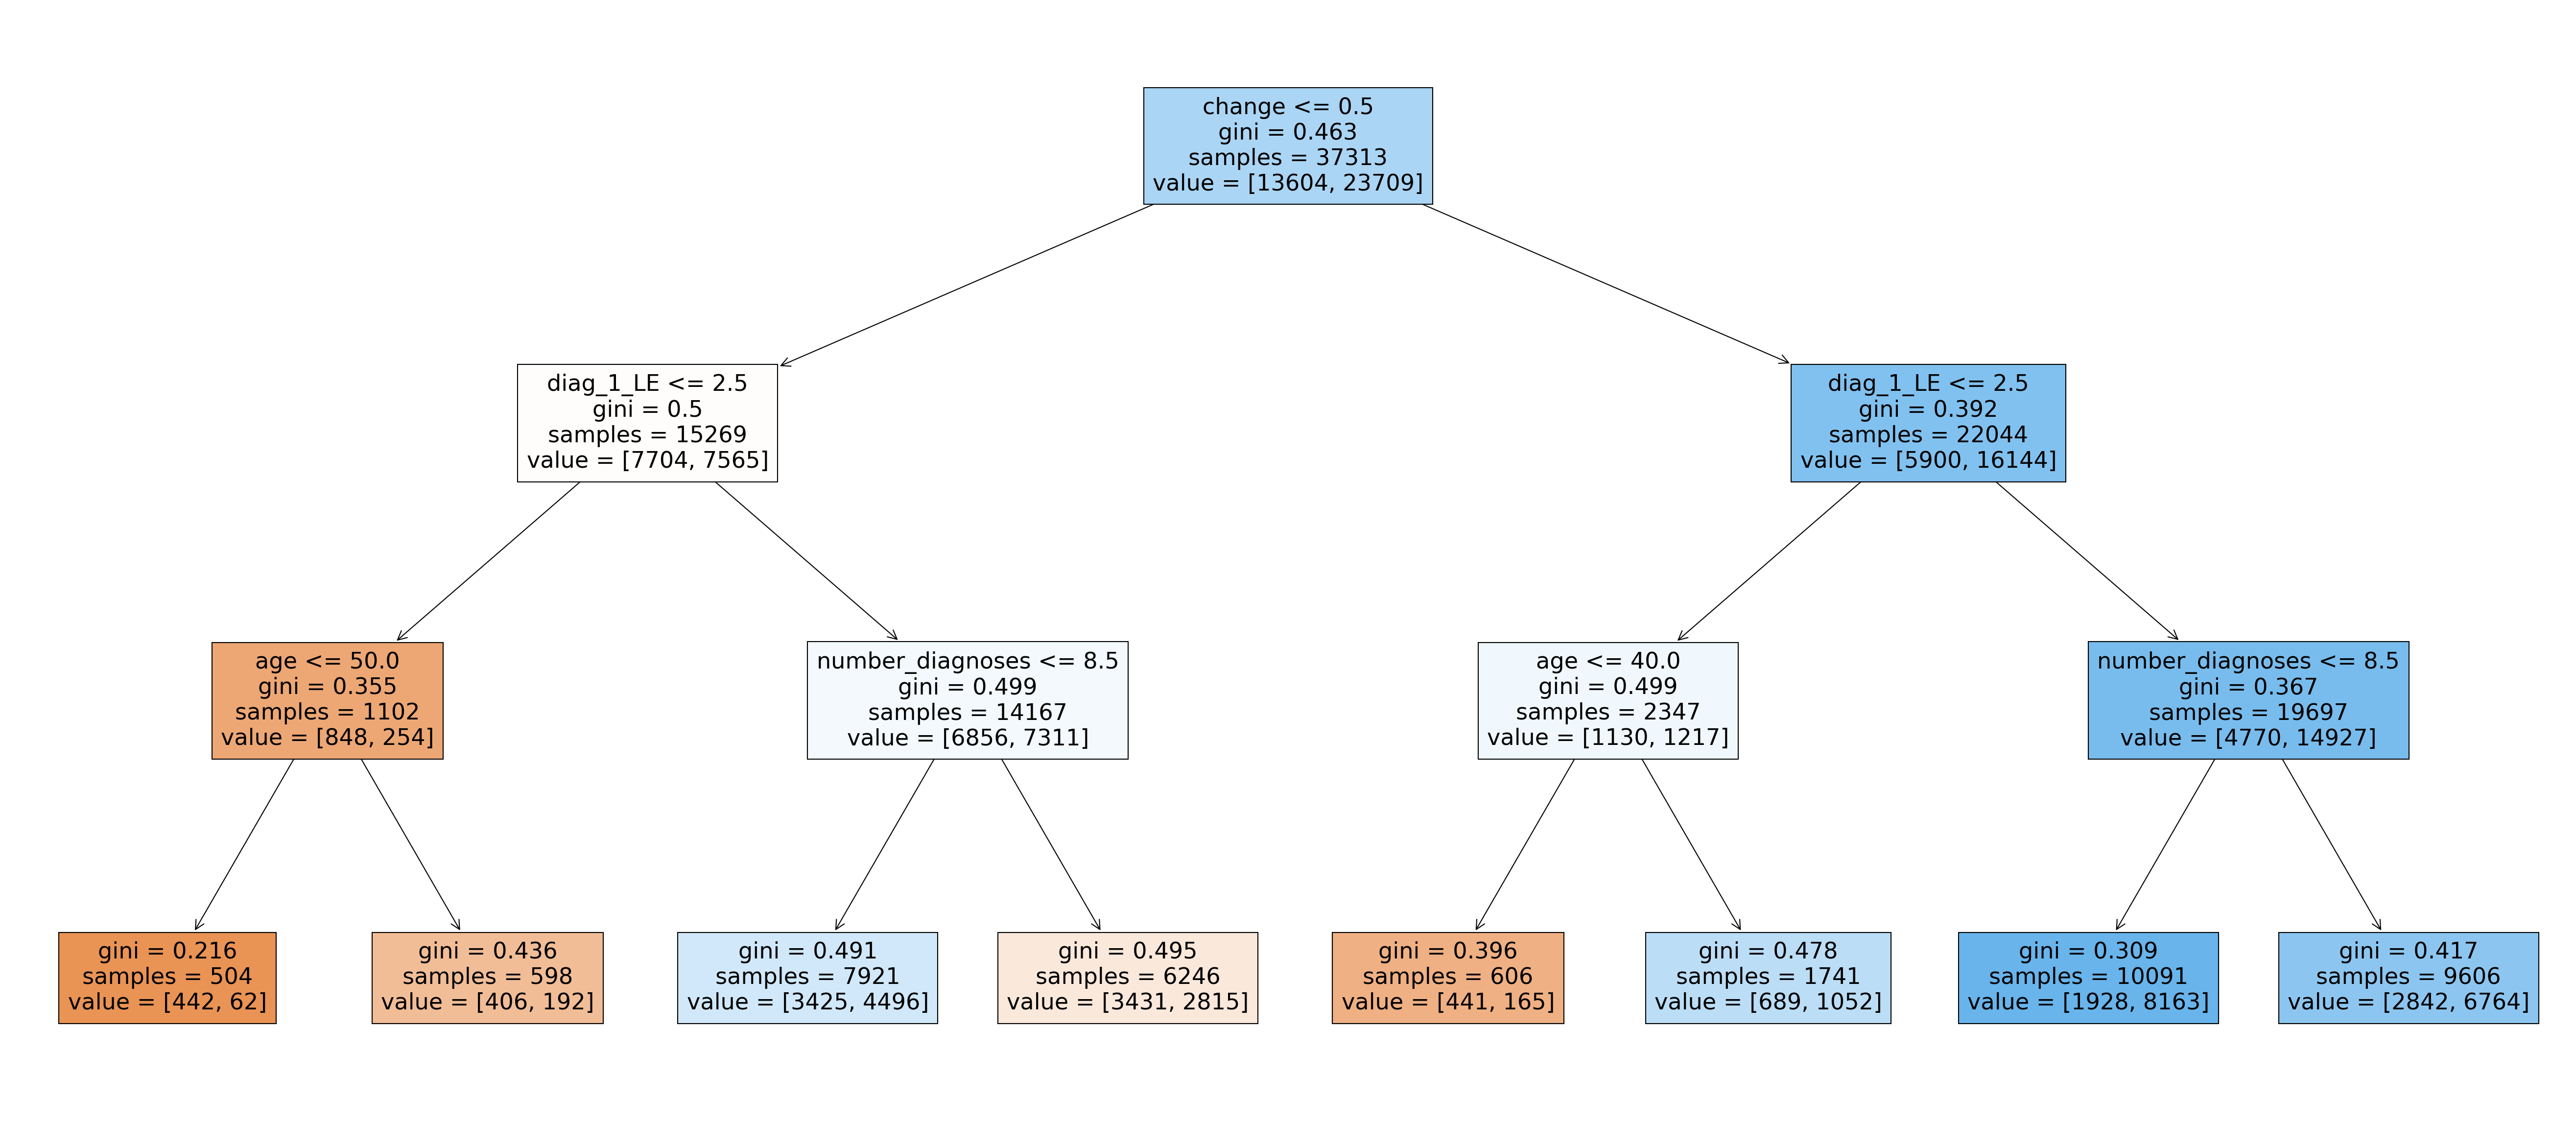

In [169]:
plt.figure(figsize=(45,20),dpi=150)
plot_tree(dt_model,filled=True,feature_names=X.columns);


### Random Forest Model:

In [242]:
# build the model on train data (X_train and y_train)
# use fit() to fit the Random Forest model

rf = RandomForestClassifier()
rf_model=rf.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

#Print classification report:
print(classification_report(y_test, y_pred_rf))

#Print accuracy score for Decision Tree model:
accuracy_rf=accuracy_score(y_test, y_pred_dt)*100
print("Accuracy score for the Decision Tree model is:",round(accuracy_rf,2))


#Print F1 score:
f1_score_rf=f1_score(y_test, y_pred_rf, average='weighted')*100
print("F1 score for the model is:", round(f1_score_rf,2))

              precision    recall  f1-score   support

           0       0.62      0.41      0.50      5883
           1       0.71      0.85      0.78     10109

    accuracy                           0.69     15992
   macro avg       0.67      0.63      0.64     15992
weighted avg       0.68      0.69      0.67     15992

Accuracy score for the Decision Tree model is: 66.71
F1 score for the model is: 67.49


In [245]:
y_pred_train_rf = rf_model.predict(X_train)
accuracy_rf_train=accuracy_score(y_train, y_pred_train_rf)
accuracy_rf_train

0.9999731996891164

### KNN Model:

In [246]:
# build the model on train data (X_train and y_train)
# use fit() to fit the KNN model

knn=KNeighborsClassifier()
knn_model=knn.fit(X_train,y_train)

y_pred_knn = knn_model.predict(X_test)

#Print classification report:
print(classification_report(y_test,y_pred_knn))


#Print Accuracy score:
accuracy_knn=accuracy_score(y_test,y_pred_knn)*100
print("Accuracy for the model is:", round(accuracy_knn,2))

#Print F1 score:
f1_score_knn=f1_score(y_test, y_pred_knn, average='weighted')*100
print("F1 score for the model is:", round(f1_score_knn,2))

              precision    recall  f1-score   support

           0       0.45      0.31      0.37      5883
           1       0.66      0.78      0.72     10109

    accuracy                           0.61     15992
   macro avg       0.56      0.55      0.54     15992
weighted avg       0.58      0.61      0.59     15992

Accuracy for the model is: 60.82
F1 score for the model is: 58.83


In [247]:
y_pred_knn_train = knn_model.predict(X_train)
accuracy_knn_train=accuracy_score(y_train,y_pred_knn_train)
accuracy_knn_train

0.7389113713719079

### Naive-Bayes Model

In [248]:
# build the model on train data (X_train and y_train)
# use fit() to fit the GaussianNB model

gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred_gnb = gnb.predict(X_test)

#Print classification report:
print(classification_report(y_test, y_pred_gnb))

#Print Accuracy Score:
accuracy_gnb=accuracy_score(y_test, y_pred_gnb)*100
print("Accuracy score for the model is: ",round(accuracy_gnb,2))

#Print F1 score:
f1_score_gnb=f1_score(y_test, y_pred_gnb, average='weighted')*100
print("F1 score for the model is:", round(f1_score_gnb,2))

              precision    recall  f1-score   support

           0       0.54      0.24      0.33      5883
           1       0.67      0.88      0.76     10109

    accuracy                           0.65     15992
   macro avg       0.60      0.56      0.54     15992
weighted avg       0.62      0.65      0.60     15992

Accuracy score for the model is:  64.58
F1 score for the model is: 60.08


In [249]:
y_pred_gnb_train = gnb.predict(X_train)
accuracy_gnb_train=accuracy_score(y_train, y_pred_gnb_train)
accuracy_gnb_train

0.6476027121914614

In [173]:
# build the model on train data (X_train and y_train)
# use fit() to fit the MultinomialNB model

mnb = MultinomialNB()
mnb.fit(X_train,y_train)
y_pred_mnb = mnb.predict(X_test)

#Print classifictaion report:
print(classification_report(y_test, y_pred_mnb))

#Print Accuracy score:
accuracy_mnb=accuracy_score(y_test, y_pred_mnb)*100
print("Accuracy score for the model is:",round(accuracy_mnb,2))


#Print F1 score:
f1_score_mnb=f1_score(y_test, y_pred_mnb, average='weighted')*100
print("F1 score for the model is:", round(f1_score_mnb,2))

              precision    recall  f1-score   support

           0       0.45      0.43      0.44      5883
           1       0.68      0.69      0.68     10109

    accuracy                           0.59     15992
   macro avg       0.56      0.56      0.56     15992
weighted avg       0.59      0.59      0.59     15992

Accuracy score for the model is: 59.45
F1 score for the model is: 59.31


In [174]:
# build the model on train data (X_train and y_train)
# use fit() to fit the GaussianNB model

bnb = BernoulliNB()
bnb.fit(X_train,y_train)
y_pred_bnb = bnb.predict(X_test)

#Print classification report:
report=classification_report(y_test, y_pred_bnb)

print(classification_report(y_test, y_pred_bnb))

#Print Accuracy Score:
accuracy_bnb=accuracy_score(y_test, y_pred_bnb)*100
print("Accuracy score for the model is: ", round(accuracy_bnb,2))

#Print F1 score:
f1_score_bnb=f1_score(y_test, y_pred_bnb, average='weighted')*100
print("F1 score for the model is:", round(f1_score_bnb,2))

              precision    recall  f1-score   support

           0       0.55      0.26      0.36      5883
           1       0.67      0.87      0.76     10109

    accuracy                           0.65     15992
   macro avg       0.61      0.57      0.56     15992
weighted avg       0.63      0.65      0.61     15992

Accuracy score for the model is:  64.88
F1 score for the model is: 61.06


### Store accuracy score and F1 score in dataframe

In [175]:
data={'Accuracy_Score' : [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_knn, accuracy_mnb, accuracy_bnb, accuracy_gnb],
     'F1_Score': [f1_score_lr, f1_score_dt, f1_score_rf, f1_score_knn, f1_score_mnb, f1_score_bnb, f1_score_gnb]}

In [176]:
df=pd.DataFrame(data, index=['Logistic_Regression', 'Decision_Tree', 'Rndom_Forest', 'KNN', 'MultinomialNB', 'BernoulliNB', 'GaussianNB'])
df

,Accuracy_Score,F1_Score
Logistic_Regression,66.639570,64.050878
Decision_Tree,66.714607,64.096339
Rndom_Forest,66.714607,67.286719
KNN,60.824162,58.834689
MultinomialNB,59.454727,59.310727
BernoulliNB,64.882441,61.060309
GaussianNB,64.582291,60.082515


##### From all the classification algorithms we have applied here we can see that none of the algorithm performed very well on the predicting target variable. So in future we will use hypertuning parameters.

## Using SMOTE to balance the target feature

In [177]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [178]:
!pip install imblearn

In [179]:
pip install delayed

Note: you may need to restart the kernel to use updated packages.


In [180]:
#The shape before smote is
print(df_final.shape)
print(X.shape)

(53305, 27)
(53305, 24)


In [181]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [182]:
#The shape after oversampling is:
print(X.shape)
print(y.shape)

(67636, 24)
(67636,)


In [183]:
y.value_counts()

1    33818
0    33818
Name: treatment_type, dtype: int64

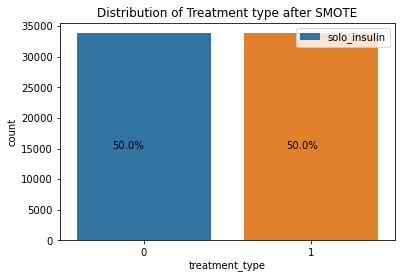

In [184]:
p_of_comb = str(round((y.value_counts()[0]/len(y))*100,2))+"%"
p_of_insulin = str(round((y.value_counts()[1]/len(y))*100,2))+"%"


sns.countplot(y)
plt.text(x=-0.19, y= 15000, s=p_of_insulin)
plt.legend(["solo_insulin"])

plt.text(x=0.85, y=15000, s=p_of_comb)
plt.title("Distribution of Treatment type after SMOTE")
plt.show()

In [185]:
#From above plot, the target column is perfectly balanced

### Train- Test Split:

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)
print('X_train size: ', X_train.shape)
print('X_test size:  ', X_test.shape)
print('y_train size:  ', y_train.shape)
print('y_test size:   ', y_test.shape)

X_train size:  (47345, 24)
X_test size:   (20291, 24)
y_train size:   (47345,)
y_test size:    (20291,)


#### Logistic Regression after Smote

In [187]:
lr=LogisticRegression()
lr_model=lr.fit(X_train, y_train)

y_testpred_lr_smote=lr_model.predict(X_test)
y_trainpred_lr_smote=lr_model.predict(X_train)


#Print Classification report:
print("Test classification report\n",classification_report(y_test,y_testpred_lr_smote))


#Print Accuracy Score for Logistic regression model:
accuracy_lr_train_smote=accuracy_score(y_train,y_trainpred_lr_smote)*100
accuracy_lr_test_smote=accuracy_score(y_test,y_testpred_lr_smote)*100
print("Accuracy score for train logistic model is:", round(accuracy_lr_train_smote,2))
print("Accuracy score for test logistic model is:", round(accuracy_lr_test_smote,2))


Test classification report
               precision    recall  f1-score   support

           0       0.70      0.67      0.69     10257
           1       0.68      0.70      0.69     10034

    accuracy                           0.69     20291
   macro avg       0.69      0.69      0.69     20291
weighted avg       0.69      0.69      0.69     20291

Accuracy score for train logistic model is: 68.42
Accuracy score for test logistic model is: 68.69


In [188]:
# # let 'y_pred_prob' be the predicted values of y
# y_pred = lr.predict(X_test)

# # print the y_pred_prob
# y_pred[:5]

In [189]:
X_train.head()

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,change,readmitted,diag_1_LE,diag_2_LE,diag_3_LE,race__Asian,race__Caucasian,race__Hispanic,race__Other
37016,0,35,3,1,7,2,47,2,18,0,4,0,5,0,0,1,1,5,4,2,0,1,0,0
44782,0,65,3,6,1,14,61,5,31,2,0,0,9,0,0,1,0,15,15,15,0,1,0,0
58876,1,65,1,1,7,4,60,0,20,0,0,0,8,0,0,1,1,7,9,3,0,0,0,0
67465,0,45,1,1,7,6,72,1,17,0,0,0,5,0,2,1,0,2,6,10,0,0,0,0
33305,0,45,3,3,1,13,55,0,30,0,0,0,8,0,2,1,1,14,14,14,0,1,0,0


In [190]:
logreg = LogisticRegression()

# build the RFE model
# pass the logistic regression model to 'estimator'
# pass number of required features to 'n_features_to_select'
# if we do not pass the number of features, RFE considers half of the features
rfe_model = RFE(estimator = logreg, n_features_to_select= 21)

# fit the RFE model on the train dataset using fit()
rfe_model = rfe_model.fit(X_train, y_train)

# create a series containing feature and its corresponding rank obtained from RFE
# 'ranking_' returns the rank of each variable after applying RFE
# pass the ranks as the 'data' of a series
# 'index' assigns feature names as index of a series 
feat_index = pd.Series(data = rfe_model.ranking_, index = X_train.columns)

# select the features with rank = 1
# 'index' returns the indices of a series (i.e. features with rank=1) 
signi_feat_rfe = feat_index[feat_index==1].index

# print the significant features obtained from RFE
print(signi_feat_rfe)

Index(['gender', 'age', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'num_lab_procedures', 'num_procedures',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'change',
       'readmitted', 'diag_1_LE', 'diag_3_LE', 'race__Asian',
       'race__Caucasian', 'race__Hispanic', 'race__Other'],
      dtype='object')


In [191]:
logreg_rfe = sm.Logit(y_train, X_train[['gender', 'age', 'admission_type_id', 'discharge_disposition_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_inpatient',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'change',
       'readmitted', 'diag_1_LE', 'diag_3_LE', 'race__Asian',
       'race__Caucasian', 'race__Hispanic', 'race__Other']]).fit()

# print the summary of the model
print(logreg_rfe.summary())

Optimization terminated successfully.
         Current function value: 0.602654
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:         treatment_type   No. Observations:                47345
Model:                          Logit   Df Residuals:                    47324
Method:                           MLE   Df Model:                           20
Date:                Sat, 28 Aug 2021   Pseudo R-squ.:                  0.1305
Time:                        15:16:50   Log-Likelihood:                -28533.
converged:                       True   LL-Null:                       -32817.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
gender                       0.3617      0.021     17.602      0.000       0.321

In [192]:
y_pred_prob_rfe = logreg_rfe.predict(X_test[['gender', 'age', 'admission_type_id', 'discharge_disposition_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_inpatient',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'change',
       'readmitted', 'diag_1_LE', 'diag_3_LE', 'race__Asian',
       'race__Caucasian', 'race__Hispanic', 'race__Other']])

In [193]:
y_pred_prob_rfe[:5]

60591    0.264883
26849    0.433701
10652    0.678211
50298    0.794755
48995    0.723632
dtype: float64

In [194]:
y_pred_rfe = [ 0 if x < 0.5 else 1 for x in y_pred_prob_rfe]

In [195]:
y_pred_rfe[:5]

[0, 0, 1, 1, 1]

In [196]:
print('AIC:', logreg_rfe.aic)

AIC: 57107.29514009078


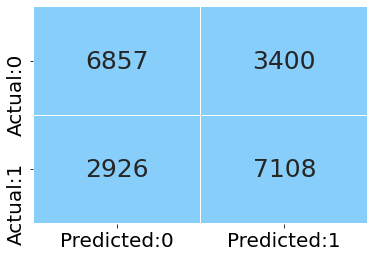

In [197]:
cm = confusion_matrix(y_test, y_pred_rfe)

conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

# plot a heatmap to visualize the confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

In [198]:
result = classification_report(y_test, y_pred_rfe)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.70      0.67      0.68     10257
           1       0.68      0.71      0.69     10034

    accuracy                           0.69     20291
   macro avg       0.69      0.69      0.69     20291
weighted avg       0.69      0.69      0.69     20291



**Plot ROC-AUC Curve:**

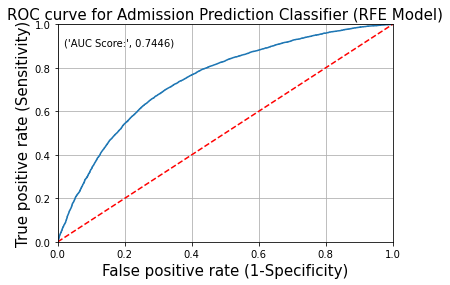

In [199]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_rfe)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Admission Prediction Classifier (RFE Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(roc_auc_score(y_test, y_pred_prob_rfe),4)))
                               
# plot the grid
plt.grid(True)

#### Decision Tree after smote

In [200]:
dt = DecisionTreeClassifier()
dt_model=dt.fit(X_train,y_train)

y_testpred_dt_smote=dt_model.predict(X_test)
y_trainpred_dt_smote=dt_model.predict(X_train)


#Print Classification report:
print("Test classification report\n",classification_report(y_test,y_testpred_dt_smote))


#Print Accuracy Score for Logistic regression model:
accuracy_dt_train_smote=accuracy_score(y_train,y_trainpred_dt_smote)*100
accuracy_dt_test_smote=accuracy_score(y_test,y_testpred_dt_smote)*100
print("Accuracy score for train Decision Tree model is:", accuracy_dt_train_smote)
print("Accuracy score for test Decision Tree model is:", accuracy_dt_test_smote)

Test classification report
               precision    recall  f1-score   support

           0       0.65      0.66      0.65     10257
           1       0.65      0.64      0.64     10034

    accuracy                           0.65     20291
   macro avg       0.65      0.65      0.65     20291
weighted avg       0.65      0.65      0.65     20291

Accuracy score for train Decision Tree model is: 100.0
Accuracy score for test Decision Tree model is: 64.82677048937953


In [201]:
#Decision Tree is overfitting requires Hyper parameter tuning

#### Decision Tree Hyperparameter Tuning

In [202]:
from sklearn.model_selection import GridSearchCV

In [203]:
tuned_parameters = [{'criterion': ['gini', 'entropy'],
                                       'max_depth': range(2,10),
                                       'min_samples_split': range(2,10),
                                       'max_features': ['sqrt', 'log2'],
                                       'min_samples_leaf': range(1,10),
                                       }]
dt_model = DecisionTreeClassifier(random_state=10)
tree_grid = GridSearchCV(estimator = dt_model, param_grid= tuned_parameters, cv=5)
tree_grid_model = tree_grid.fit(X_train, y_train)
print(tree_grid_model.best_params_)

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 6, 'min_samples_split': 2}


In [204]:
#Build DecisionTree model using the hyperparameters

In [205]:
dt_best = DecisionTreeClassifier(criterion= 'entropy', max_depth = 9, max_features='sqrt', min_samples_leaf= 1, min_samples_split=3)
dt_model_best=dt_best.fit(X_train,y_train)

y_testpred_dt_smote_best=dt_model_best.predict(X_test)
y_trainpred_dt_smote_best=dt_model_best.predict(X_train)


#Print Classification report:
print("Test classification report\n",classification_report(y_test,y_testpred_dt_smote_best))


#Print Accuracy Score for Logistic regression model:
accuracy_dt_train_smote_best=accuracy_score(y_train,y_trainpred_dt_smote_best)*100
accuracy_dt_test_smote_best=accuracy_score(y_test,y_testpred_dt_smote_best)*100
print("Accuracy score for train Decision Tree model is:", accuracy_dt_train_smote_best)
print("Accuracy score for test Decision Tree model is:", accuracy_dt_test_smote_best)

Test classification report
               precision    recall  f1-score   support

           0       0.68      0.69      0.68     10257
           1       0.68      0.67      0.67     10034

    accuracy                           0.68     20291
   macro avg       0.68      0.68      0.68     20291
weighted avg       0.68      0.68      0.68     20291

Accuracy score for train Decision Tree model is: 68.72531418312387
Accuracy score for test Decision Tree model is: 67.98087822187176


Accuracy score for train and test are very close and hence the model is not overfitted
Model accuracy with hyper-parameters is 68%

In [208]:
from sklearn import tree

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.792507 to fit



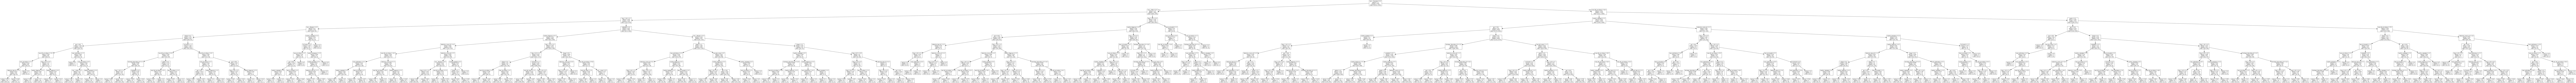

In [209]:
labels = X_train.columns
dot_data = tree.export_graphviz(dt_model_best, feature_names = labels)  

graph = pydotplus.graph_from_dot_data(dot_data)  

Image(graph.create_png())

#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_classification = RandomForestClassifier(n_estimators = 10, random_state = 10)
rf_model = rf_classification.fit(X_train, y_train)

In [ ]:
y_pred_rf = rf_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_rf))

In [ ]:
print("Accuracy of test rf model:",round(accuracy_score(y_test, y_pred_rf)*100,2),'%')

In [ ]:
y_pred_rf_train = rf_model.predict(X_train)

In [ ]:
print("Accuracy of train rf model:",round(accuracy_score(y_train, y_pred_rf_train)*100,2),'%')

Accuracy score of train is greater than test, hence the model is overfitted

<br> Random Forest Hyperparameter tuning: </br>

In [ ]:
tuned_parameters = [{'criterion':['gini', 'entropy'],
                                      'n_estimators': [10,20,30,40,50],
                                      'max_depth': [10,15,20],
                                      'max_features': ['sqrt', 'log2'],
                                      'min_samples_split': [2,5,8,11],
                                      'min_samples_leaf' : [1,5,9],
                                      'max_leaf_nodes': [2,5,8,11]}]

In [ ]:
random_forest_classification = RandomForestClassifier(random_state = 10)

rf_grid = GridSearchCV(estimator = random_forest_classification, param_grid = tuned_parameters, cv=5)
rf_grid_model = rf_grid.fit(X_train, y_train)
print("Best parameters for random forest classifier:", rf_grid_model.best_params_)

In [ ]:
#Build Random Forest Model using Hyper-parameters:

In [ ]:
rf_classification_best = RandomForestClassifier(criterion ='entropy', max_depth=10, max_features='sqrt', max_leaf_nodes=11, min_samples_leaf=1, min_samples_split=2, n_estimators=50)
rf_model_best = rf_classification_best.fit(X_train, y_train)

In [ ]:
y_pred_rf_best = rf_model_best.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_rf_best))

In [ ]:
print("Accuracy of test rf model:",round(accuracy_score(y_test, y_pred_rf_best)*100,2),'%')

In [ ]:
y_pred_rf_best_train = rf_model_best.predict(X_train)

In [ ]:
print("Accuracy of train rf model:",round(accuracy_score(y_train, y_pred_rf_best_train)*100,2),'%')

In [ ]:
# Accuracy of Model using Random Forest algorithm is 69.21%

#### Boosting

## Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ada_classification = AdaBoostClassifier(n_estimators = 10, random_state = 10)
ada_model = ada_classification.fit(X_train, y_train)

In [ ]:
y_pred_ada = ada_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_ada))

In [ ]:
print("Accuracy of test ada model:",round(accuracy_score(y_test, y_pred_ada)*100,2),'%')

In [ ]:
y_pred_ada_train = ada_model.predict(X_train)

In [ ]:
print("Accuracy of train ada model:",round(accuracy_score(y_train, y_pred_ada_train)*100,2),'%')

## AdaboostModel Hyperparameter tuning

In [ ]:
tuned_parameters = [{'n_estimators': [10,20,30,40,50],
                                      'learning_rate':[0.1, 0.01, 0.001, 0.15, 0.015]}]

In [ ]:
adaboost_classification = AdaBoostClassifier(random_state = 10)

ada_grid = GridSearchCV(estimator = adaboost_classification, param_grid = tuned_parameters, cv=5)
ada_grid_model = ada_grid.fit(X_train, y_train)
print("Best parameters for AdaBoost classifier:", ada_grid_model.best_params_)

In [ ]:
#Build AdaBoost Model using Hyper-parameters:

In [ ]:
ada_classification_best = AdaBoostClassifier(n_estimators=50, learning_rate = 0.15)
ada_model_best = ada_classification_best.fit(X_train, y_train)

In [ ]:
y_pred_ada_best = ada_model_best.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_ada_best))

In [ ]:
print("Accuracy of test ada model:",round(accuracy_score(y_test, y_pred_ada_best)*100,2),'%')

In [ ]:
y_pred_ada_best_train = ada_model_best.predict(X_train)

In [ ]:
print("Accuracy of train ada model:",round(accuracy_score(y_train, y_pred_ada_best_train)*100,2),'%')

## GradientBoosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gboost_classification = GradientBoostingClassifier(n_estimators = 10, random_state = 10)
gboost_model = gboost_classification.fit(X_train, y_train)

In [ ]:
y_pred_gboost = gboost_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_gboost))

In [ ]:
print("Accuracy of test gboost model:",round(accuracy_score(y_test, y_pred_gboost)*100,2),'%')

In [ ]:
y_pred_gboost_train = gboost_model.predict(X_train)

In [ ]:
print("Accuracy of train gboost model:",round(accuracy_score(y_train, y_pred_gboost_train)*100,2),'%')

## XGBoost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb_classification = XGBClassifier(n_estimators = 0.01, random_state = 10, gamma=2)
xgb_model = ada_classification.fit(X_train, y_train)

In [ ]:
y_pred_xgb = xgb_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_xgb))

In [ ]:
print("Accuracy of test xgb model:",round(accuracy_score(y_test, y_pred_xgb)*100,2),'%')

In [ ]:
y_pred_xgb_train = xgb_model.predict(X_train)

In [ ]:
print("Accuracy of train xgb model:",round(accuracy_score(y_train, y_pred_xgb_train)*100,2),'%')

## XGBoost Hyperparameter tuning:

In [ ]:
tuned_parameters = [{'n_estimators': [10,20,30,40,50],
                                      'learning_rate':[0.1, 0.01, 0.001, 0.15, 0.015],
                                        'gamma': [2,3,4,5,6],
                                        'max_depth' : [2, 3, 4, 5, 6]}]

In [ ]:
xgb_classification = XGBClassifier(random_state = 10)

xgb_grid = GridSearchCV(estimator = xgb_classification, param_grid = tuned_parameters, cv=5)
xgb_grid_model = xgb_grid.fit(X_train, y_train)
print("Best parameters for XGB classifier:", xgb_grid_model.best_params_)

In [ ]:
#Build XGBClassifier Model using Hyper-parameters:

In [ ]:
xgb_classification_best = XGBClassifier(n_estimators=50, learning_rate = 0.15 ,max_depth=6 , gamma=4)
xgb_model_best = xgb_classification_best.fit(X_train, y_train)

In [ ]:
y_pred_xgb_best = xgb_model_best.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_xgb_best))

In [ ]:
print("Accuracy of test xgb model:",round(accuracy_score(y_test, y_pred_xgb_best)*100,2),'%')

In [ ]:
y_pred_xgb_best_train = xgb_model_best.predict(X_train)

In [ ]:
print("Accuracy of train xgb model:",round(accuracy_score(y_train, y_pred_xgb_best_train)*100,2),'%')

### LightGBM

In [210]:
import lightgbm as lgb

In [211]:
clf = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.01)
clf.fit(X_train, y_train)

LGBMClassifier(learning_rate=0.01)

In [212]:
y_pred_clf = clf.predict(X_test)

In [213]:
print(classification_report(y_test, y_pred_clf))

              precision    recall  f1-score   support

           0       0.71      0.68      0.70     10257
           1       0.69      0.72      0.70     10034

    accuracy                           0.70     20291
   macro avg       0.70      0.70      0.70     20291
weighted avg       0.70      0.70      0.70     20291



In [214]:
print("Accuracy of test lgbm model:",round(accuracy_score(y_test, y_pred_clf)*100,2),'%')

Accuracy of test lgbm model: 70.09 %


In [215]:
y_pred_clf_train = clf.predict(X_train)

In [216]:
print("Accuracy of train lgbm model:",round(accuracy_score(y_train, y_pred_clf_train)*100,2),'%')

Accuracy of train lgbm model: 69.95 %


#### Hyperparamter tuning using gridSearch:

In [217]:
tuned_parameters = ({'n_estimators' : [10,20,30,40,50,60], 
                    'learning_rate':[0.1, 0.01, 0.001,0.015],
                    'num_leaves':range(20,60,10)})

In [218]:
lgbm_classification = lgb.LGBMClassifier(random_state = 10)

lgbm_grid = GridSearchCV(estimator = lgbm_classification, param_grid = tuned_parameters, cv=5)
lgbm_grid_model = lgbm_grid.fit(X_train, y_train)
print("Best parameters for LGBM classifier:", lgbm_grid_model.best_params_)

Best parameters for LGBM classifier: {'learning_rate': 0.1, 'n_estimators': 60, 'num_leaves': 40}


In [ ]:
#Build LGBMClassifier Model using Hyper-parameters:

In [219]:
lgbm_classification_best = lgb.LGBMClassifier(n_estimators=60, learning_rate = 0.1 ,num_leaves=60)
lgbm_model_best = lgbm_classification_best.fit(X_train, y_train)

In [220]:
y_pred_lgbm_best = lgbm_model_best.predict(X_test)

In [221]:
print(classification_report(y_test, y_pred_lgbm_best))

              precision    recall  f1-score   support

           0       0.76      0.70      0.72     10257
           1       0.71      0.77      0.74     10034

    accuracy                           0.73     20291
   macro avg       0.73      0.73      0.73     20291
weighted avg       0.73      0.73      0.73     20291



In [222]:
print("Accuracy of test lgbm model:",round(accuracy_score(y_test, y_pred_lgbm_best)*100,2),'%')

Accuracy of test lgbm model: 73.2 %


In [223]:
y_pred_lgbm_best_train = lgbm_model_best.predict(X_train)

In [224]:
print("Accuracy of train LGBM model:",round(accuracy_score(y_train, y_pred_lgbm_best_train)*100,2),'%')

Accuracy of train LGBM model: 75.62 %


**Plot ROC- AUC Score:**

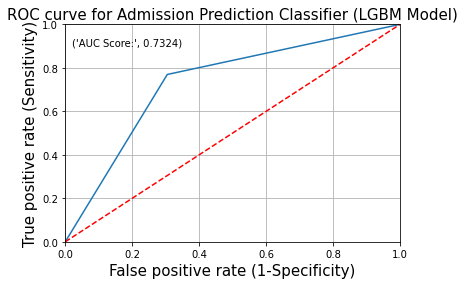

In [225]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lgbm_best)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Admission Prediction Classifier (LGBM Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(roc_auc_score(y_test, y_pred_lgbm_best),4)))
                               
# plot the grid
plt.grid(True)